# ML End-to-End Projekt: Student Performance Prediction

**Autoren:** David Luck, Simon Hüberli-Carrasco  
**Datum:** HS 2025
**OST - Ostschweizer Fachhochschule**

Quelle des Datensatz: https://www.kaggle.com/datasets/lainguyn123/student-performance-factors

![OST Logo](https://www.ost.ch/de/mediathek/_jcr_content/root/stage/image.img.3.high.jpg/1662646826512.jpg)

---

## (a) Einleitung

### Beschreibung der Aufgabe
Dieses Projekt befasst sich mit der Vorhersage der Prüfungsleistung (Exam_Score) von Studenten basierend auf verschiedenen Einflussfaktoren. Der Datensatz enthält 20 verschiedene Features, die verschiedene Aspekte des studentischen Lebens abbilden, darunter Lerngewohnheiten (Hours_Studied), Anwesenheit (Attendance), sozioökonomische Faktoren (Family_Income, Parental_Education_Level), persönliche Faktoren (Sleep_Hours, Motivation_Level) sowie schulische Rahmenbedingungen (Teacher_Quality, School_Type).


## (b) Zielsetzung und Vorgehensweise

### Zielsetzung
**Hauptziel:** Entwicklung eines Machine Learning Modells zur präzisen Vorhersage des Exam_Score von Studenten (kontinuierlicher Wert zwischen 0 und 100 Punkten).

**Teilziele:**
1. Identifikation der wichtigsten Einflussfaktoren auf die Prüfungsleistung
2. Entwicklung einer robusten ML-Pipeline für Datenverarbeitung und Modelltraining
3. Vergleich verschiedener Regressionsalgorithmen
4. Optimierung des besten Modells durch Hyperparameter-Tuning

### Ansatz
1. **Explorative Datenanalyse (EDA):** Verstehen der Datenstruktur, Identifikation von Mustern, Ausreissern und Korrelationen
2. **Data Preprocessing:** Behandlung fehlender Werte, Feature Engineering, Encoding kategorischer Variablen
3. **Feature Selection:** Identifikation der relevantesten Features
4. **Pipeline-Entwicklung:** Aufbau einer automatisierten ML-Pipeline für reproduzierbare Ergebnisse
5. **Modellvergleich:** Evaluation verschiedener Algorithmen (No Free Lunch Theorem)
6. **Hyperparameter-Tuning:** Optimierung des besten Modells mittels Grid Search oder Random Search
7. **Kreuzvalidierung:** Robuste Bewertung der Modellleistung
8. **Final Testing:** Evaluation auf Test-Set

### Metrik
**Primäre Metrik:** **RMSE (Root Mean Squared Error)**  
- RMSE bestraft grössere Fehler stärker und ist gut interpretierbar in den Original-Einheiten (Punkte)


---

## (c) Explorative Datenanalyse (EDA)

### 3.1 Daten laden und erste Inspektion

---

In [1]:
# Bibliotheken importieren
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Regression Modelle
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# Metriken
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Weitere Libraries nach Bedarf
import warnings
warnings.filterwarnings('ignore')

# Plotting Einstellungen
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

In [2]:
# Daten laden
df = pd.read_csv('StudentPerformanceFactors.csv')

In [3]:
# Erste Inspektion
print("=== Datensatz Übersicht ===")
print(f"Anzahl Zeilen: {df.shape[0]}")
print(f"Anzahl Spalten: {df.shape[1]}")
print("\n=== Erste 5 Zeilen ===")
display(df.head())
print("\n=== Datentypen ===")
print(df.dtypes)
print("\n=== Fehlende Werte ===")
print(df.isnull().sum())
print("\n=== Statistische Kennzahlen ===")
display(df.describe())

=== Datensatz Übersicht ===
Anzahl Zeilen: 6607
Anzahl Spalten: 20

=== Erste 5 Zeilen ===


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70



=== Datentypen ===
Hours_Studied                  int64
Attendance                     int64
Parental_Involvement          object
Access_to_Resources           object
Extracurricular_Activities    object
Sleep_Hours                    int64
Previous_Scores                int64
Motivation_Level              object
Internet_Access               object
Tutoring_Sessions              int64
Family_Income                 object
Teacher_Quality               object
School_Type                   object
Peer_Influence                object
Physical_Activity              int64
Learning_Disabilities         object
Parental_Education_Level      object
Distance_from_Home            object
Gender                        object
Exam_Score                     int64
dtype: object

=== Fehlende Werte ===
Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Prev

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


### 3.2 Datenbereinigung und Verständnis

---

In [4]:
# Fehlende Werte behandeln
# Insgesamt sind nur wenige (64) fehlende Werte vorhanden, deshalb löschen wir diese Zeilen
df.dropna(inplace=True)

# Duplikate prüfen
df.duplicated().sum()



np.int64(0)

In [5]:
# Kategorische Variablen identifizieren und deren Unique Values anzeigen
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    print(f"{col}: {df[col].nunique()} unique values")
    print (df[col].values)



Parental_Involvement: 3 unique values
['Low' 'Low' 'Medium' ... 'Medium' 'High' 'Medium']
Access_to_Resources: 3 unique values
['High' 'Medium' 'Medium' ... 'Low' 'High' 'Low']
Extracurricular_Activities: 2 unique values
['No' 'No' 'Yes' ... 'Yes' 'Yes' 'Yes']
Motivation_Level: 3 unique values
['Low' 'Low' 'Medium' ... 'Low' 'High' 'Medium']
Internet_Access: 2 unique values
['Yes' 'Yes' 'Yes' ... 'Yes' 'Yes' 'Yes']
Family_Income: 3 unique values
['Low' 'Medium' 'Medium' ... 'Low' 'Low' 'Medium']
Teacher_Quality: 3 unique values
['Medium' 'Medium' 'Medium' ... 'Medium' 'Medium' 'Medium']
School_Type: 2 unique values
['Public' 'Public' 'Public' ... 'Public' 'Private' 'Public']
Peer_Influence: 3 unique values
['Positive' 'Negative' 'Neutral' ... 'Negative' 'Positive' 'Positive']
Learning_Disabilities: 2 unique values
['No' 'No' 'No' ... 'No' 'No' 'No']
Parental_Education_Level: 3 unique values
['High School' 'College' 'Postgraduate' ... 'Postgraduate' 'High School'
 'Postgraduate']
Distan

### 3.3 Univariate Analyse

Analyse einzelner Variablen zur Verteilungsanalyse

---

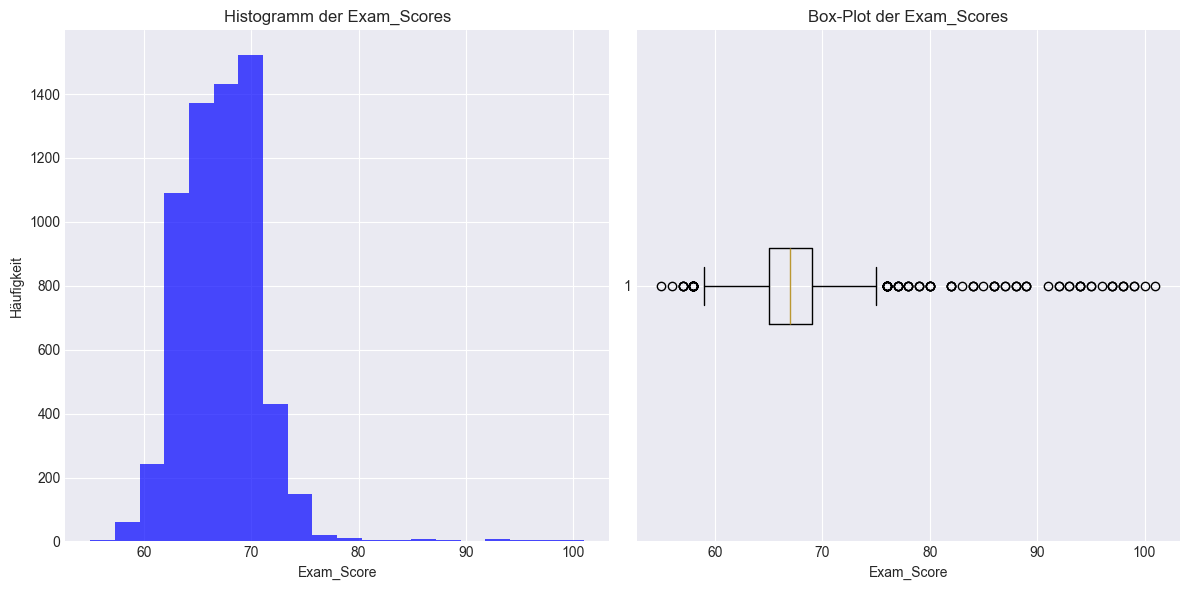

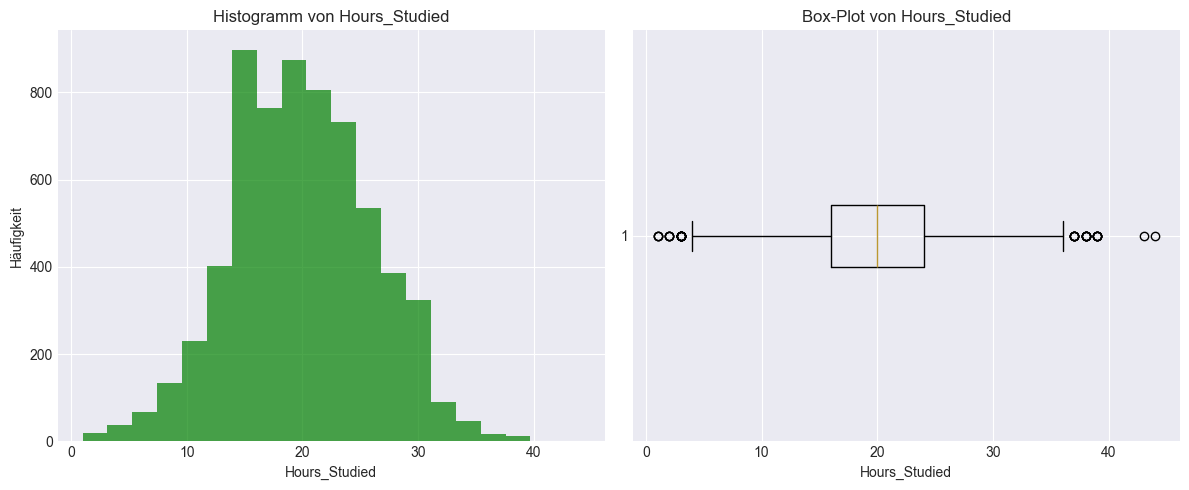

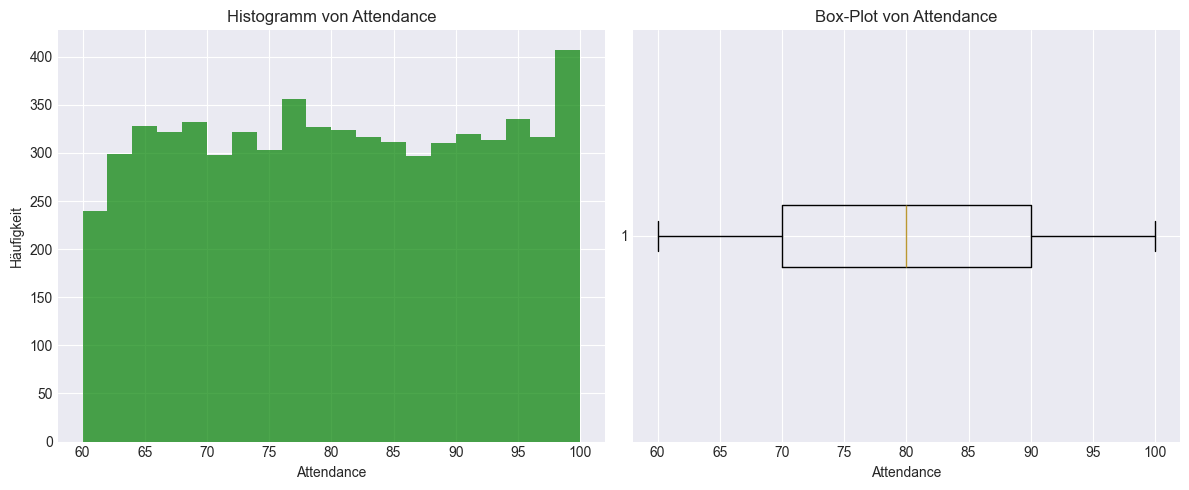

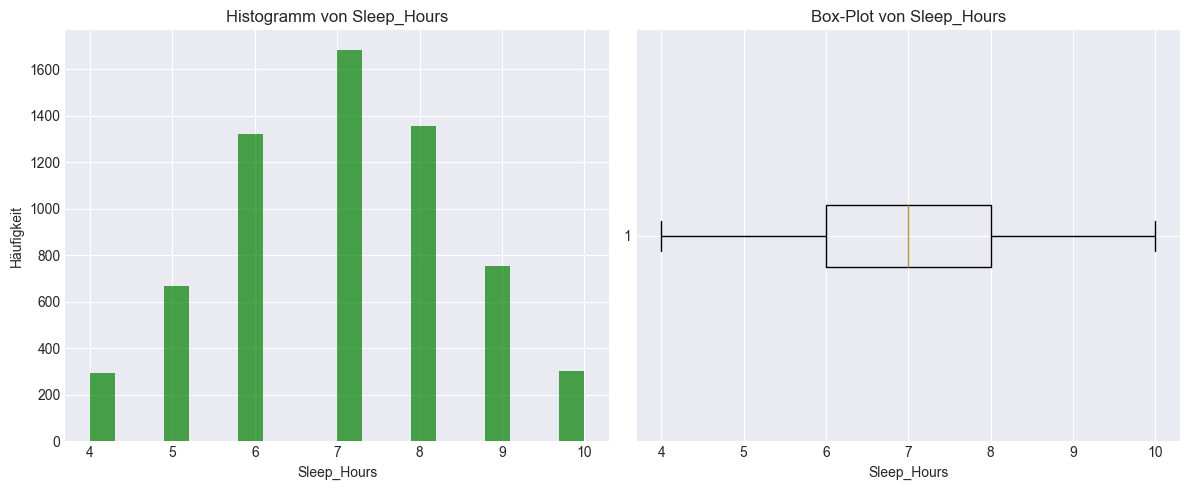

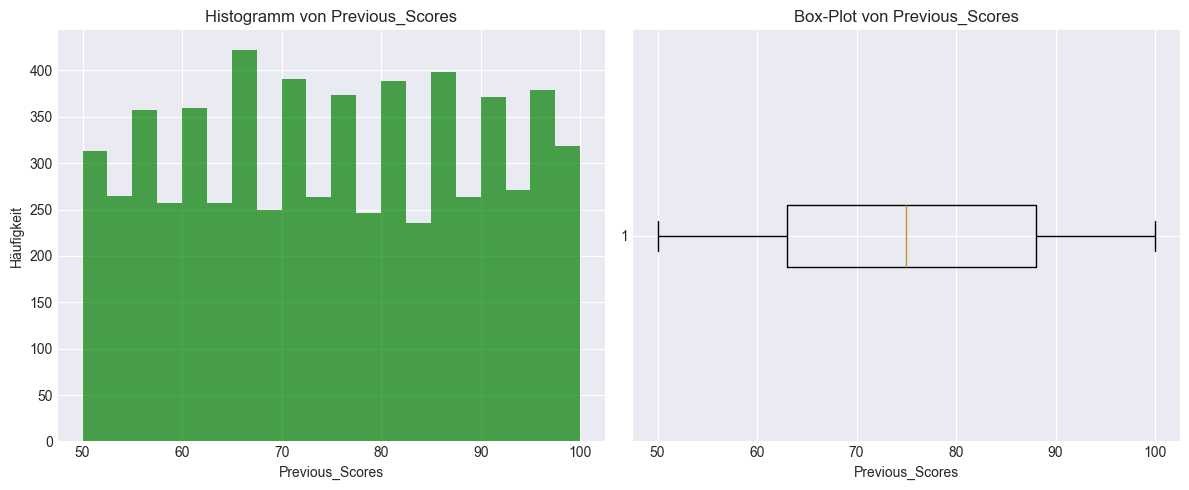

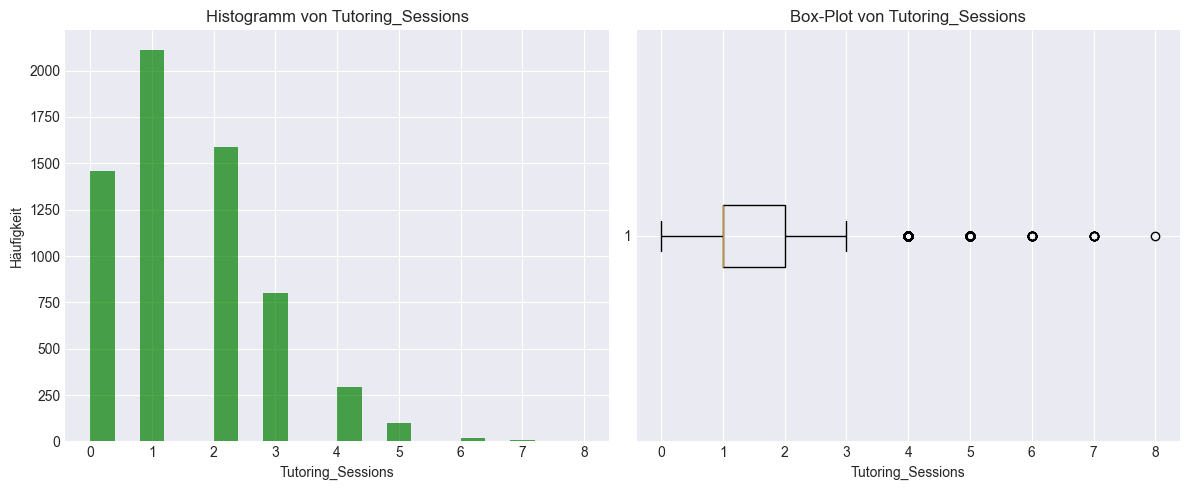

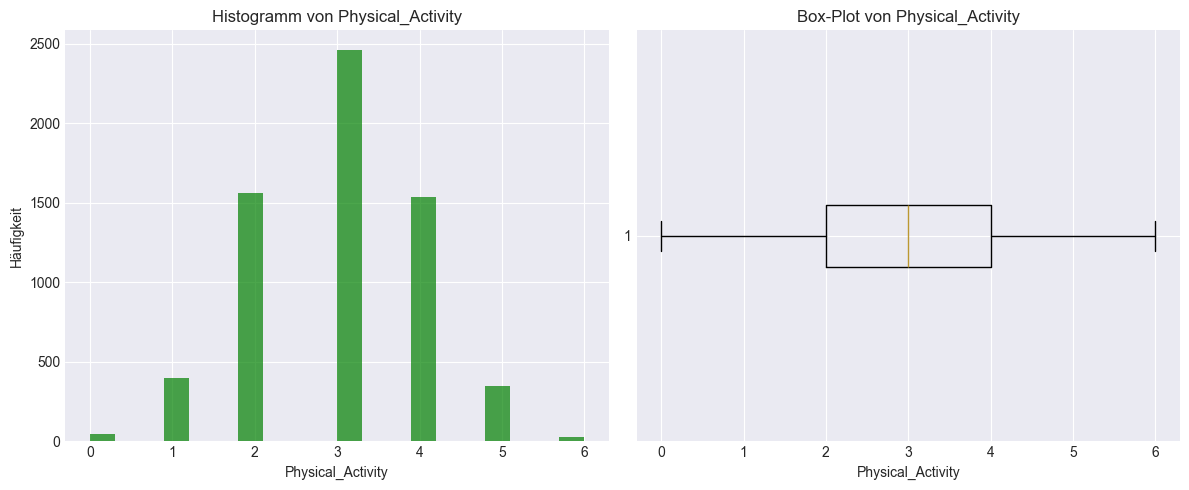

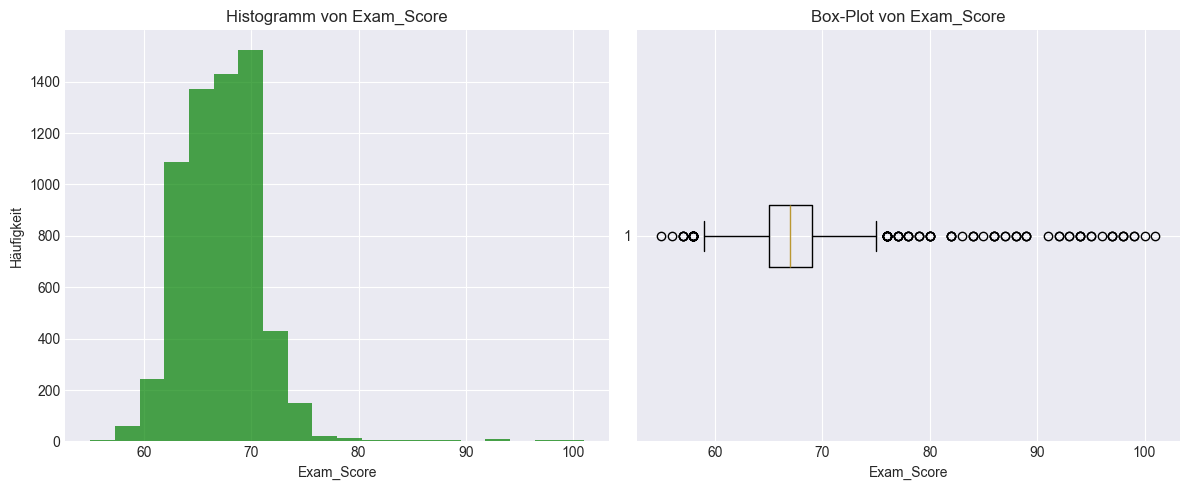

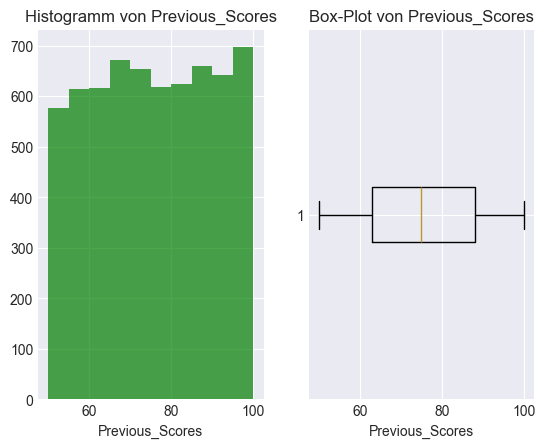

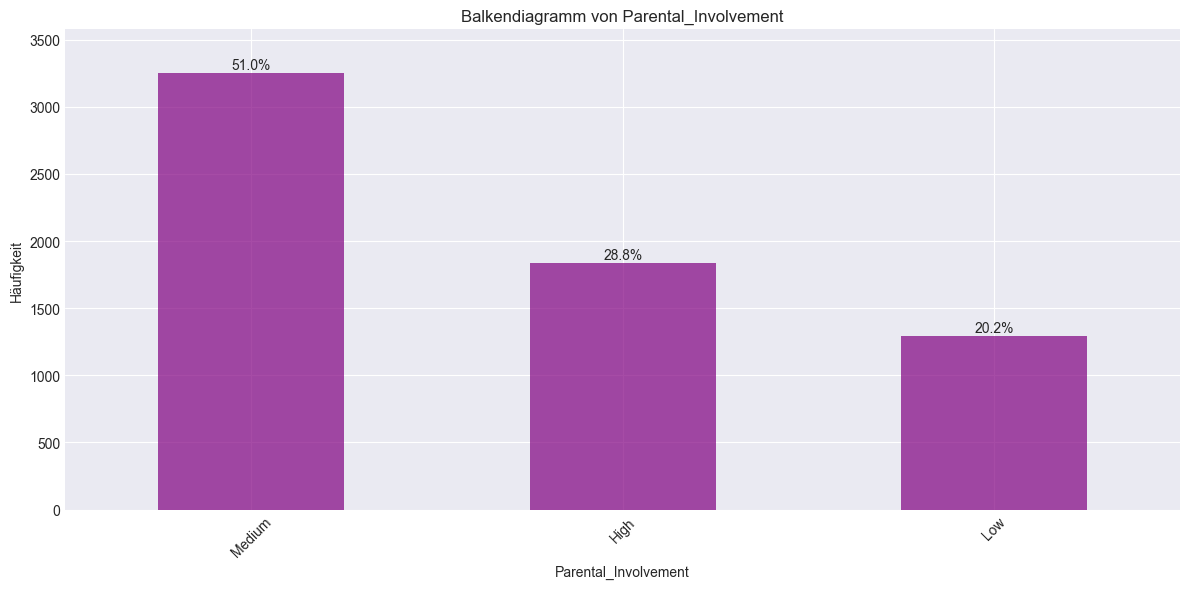

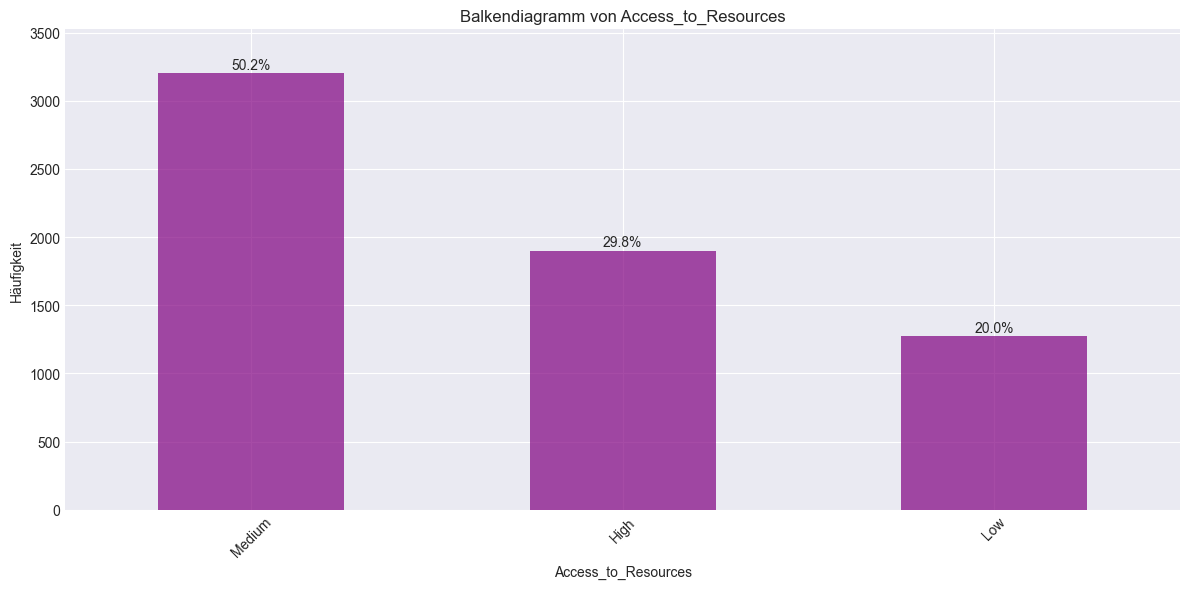

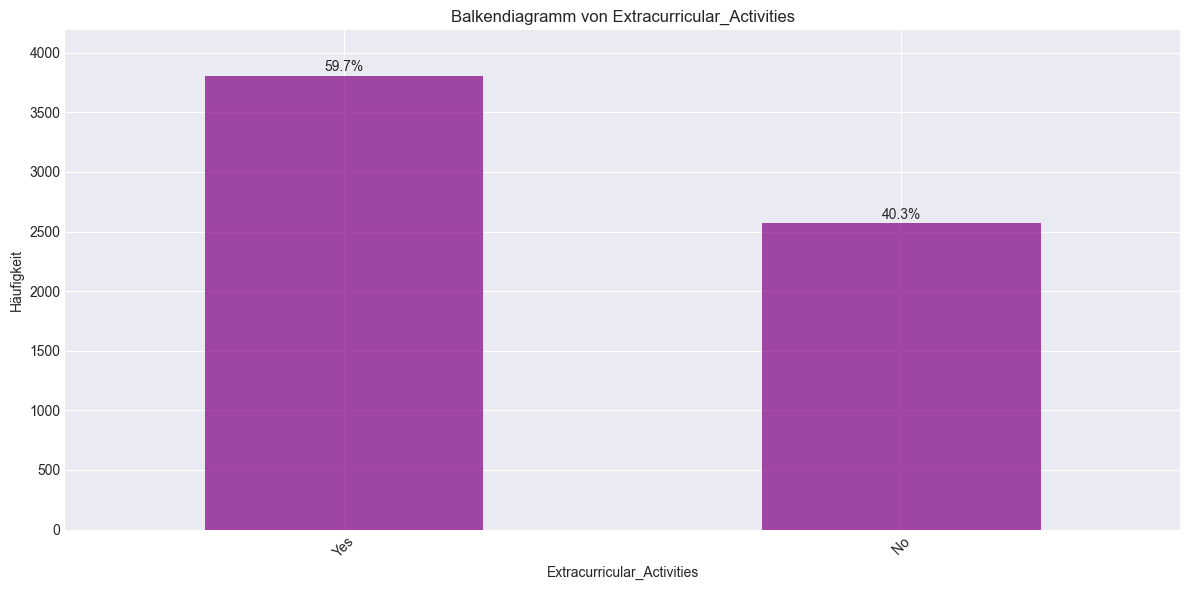

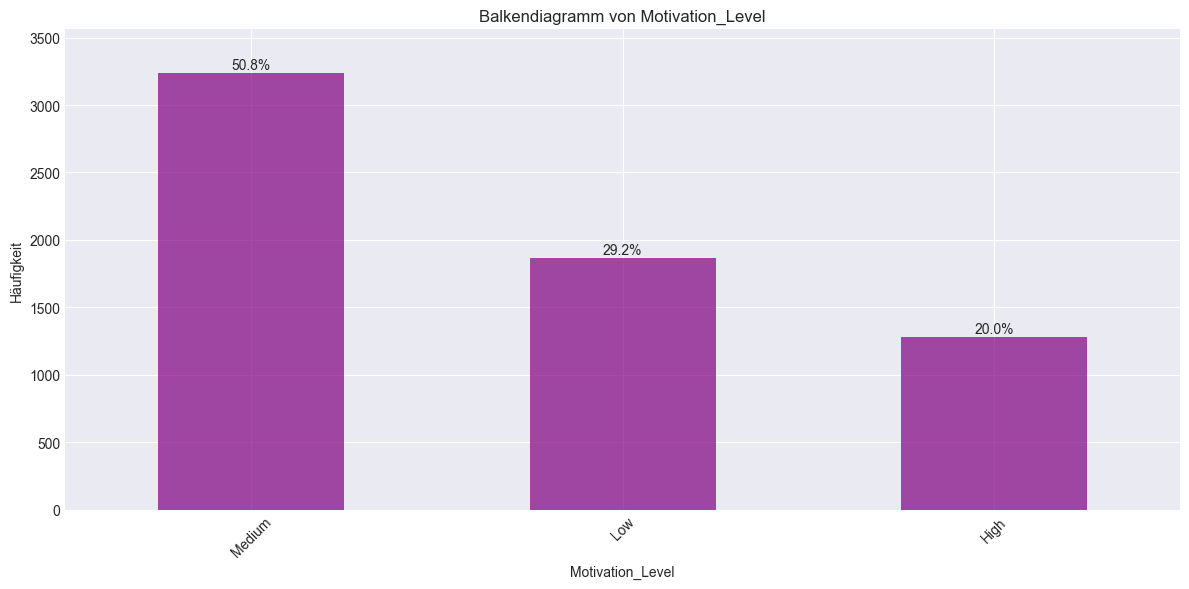

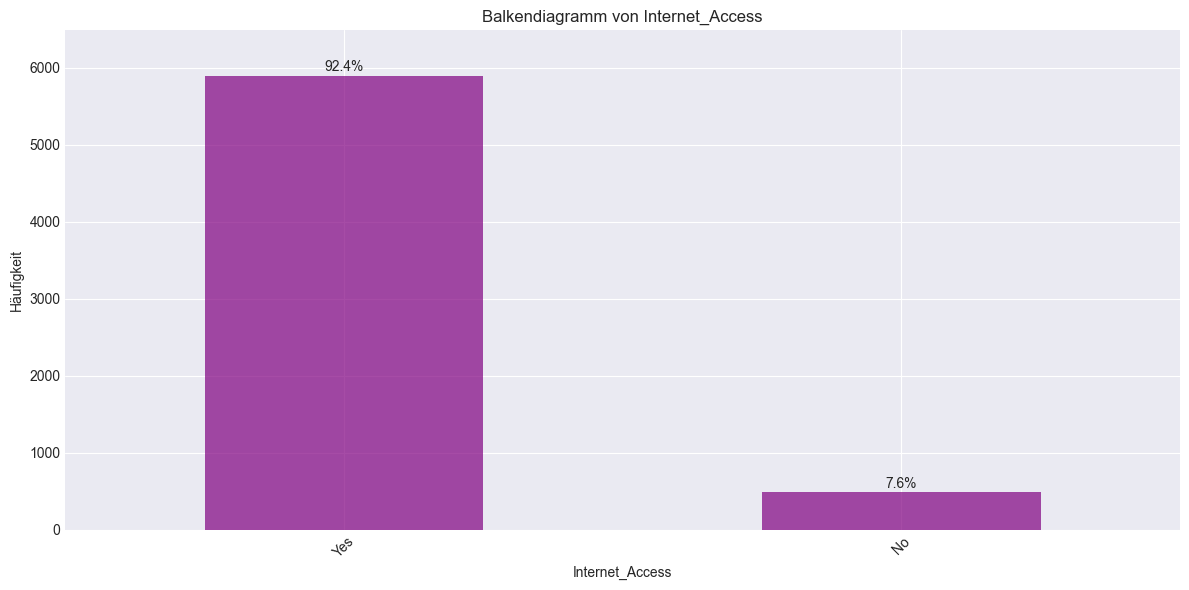

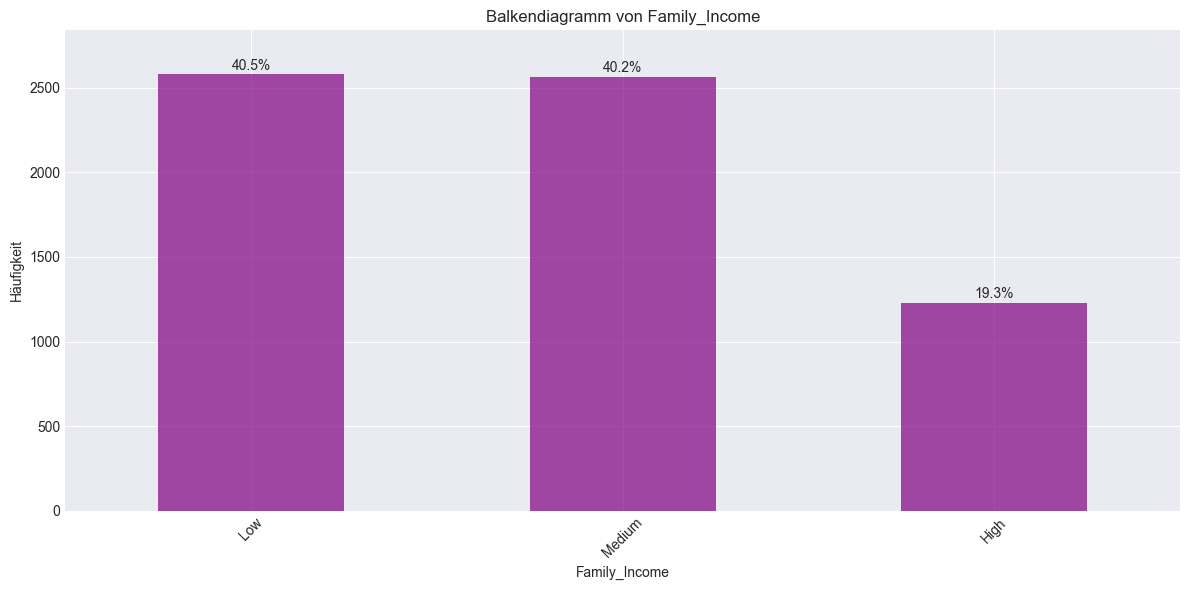

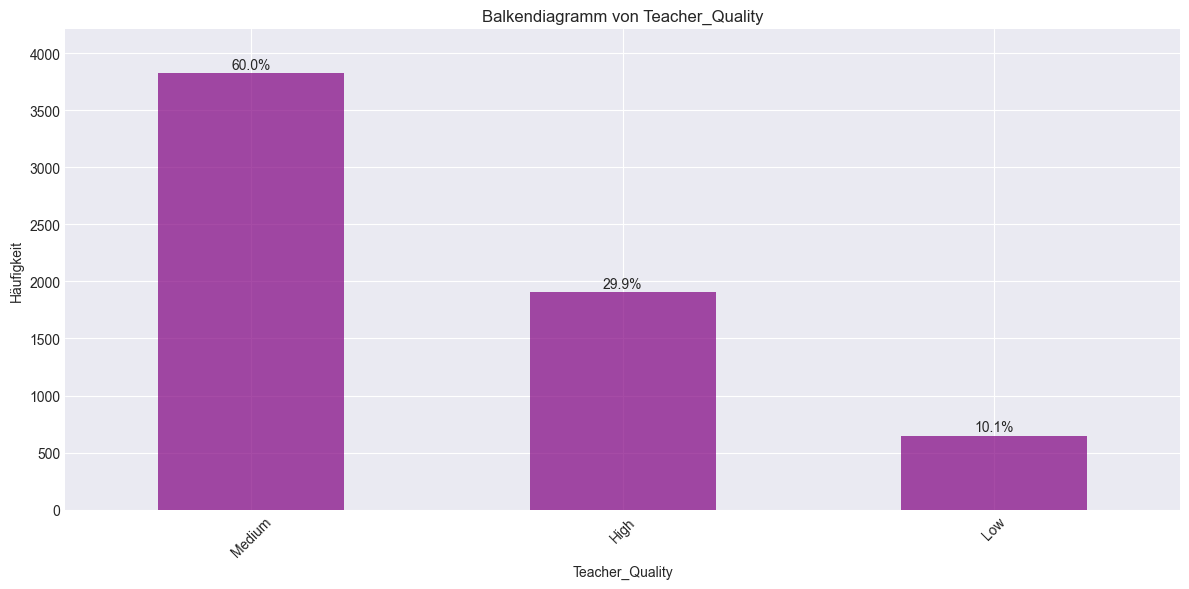

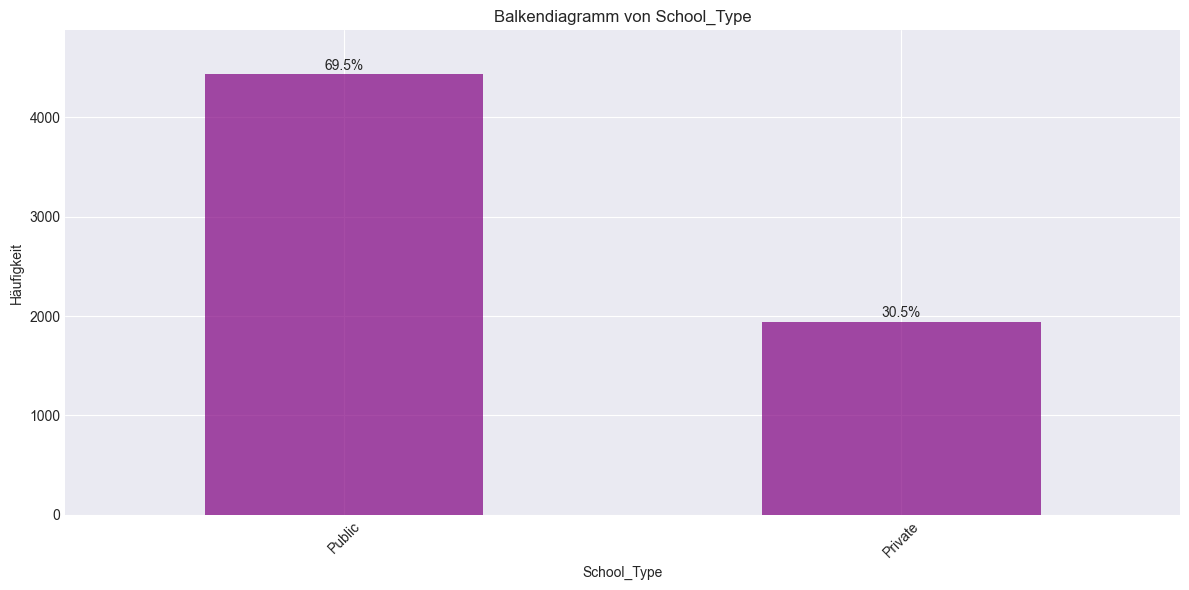

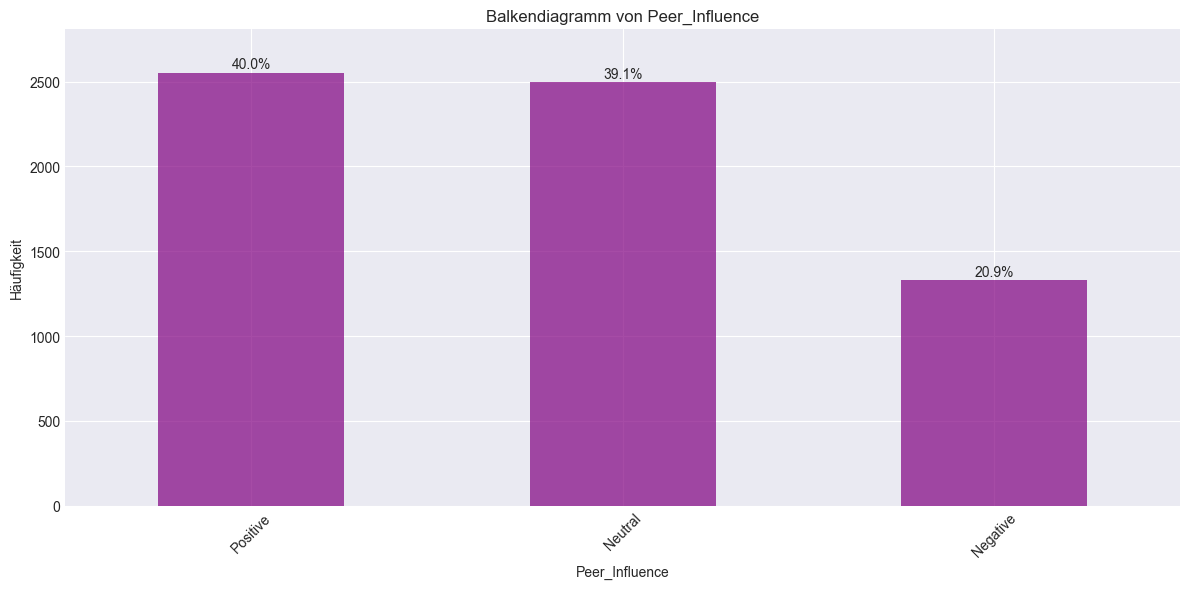

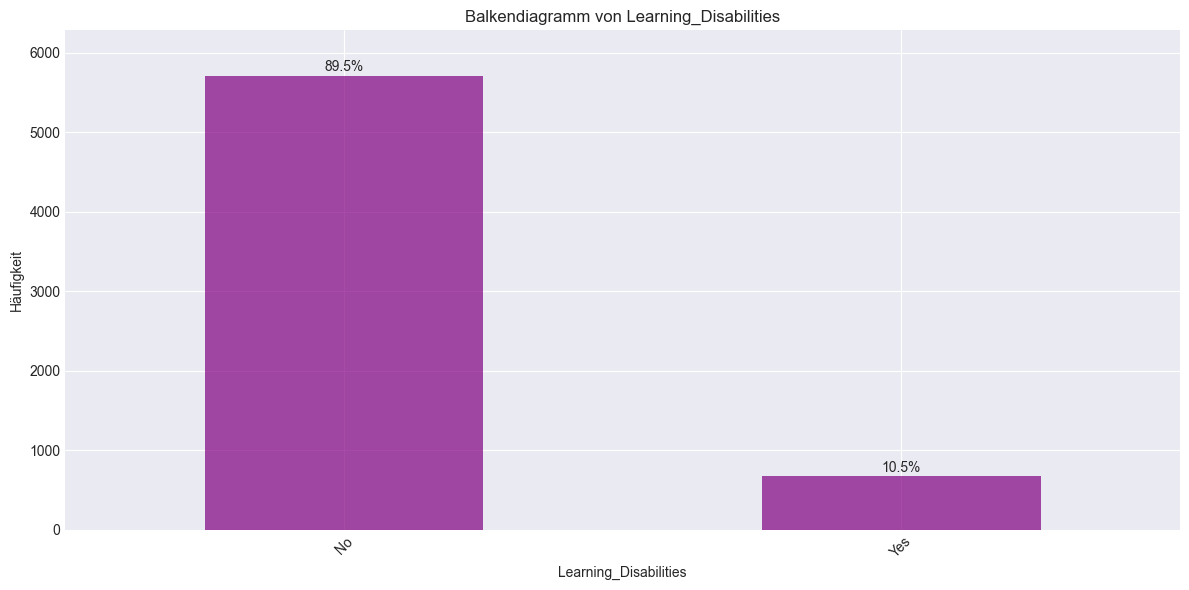

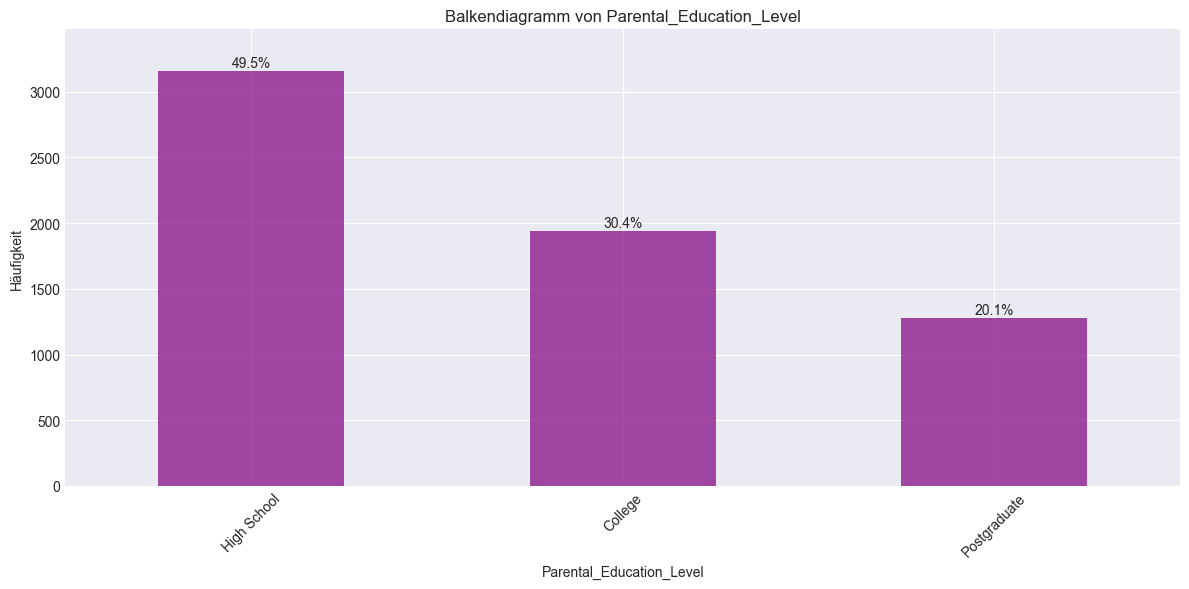

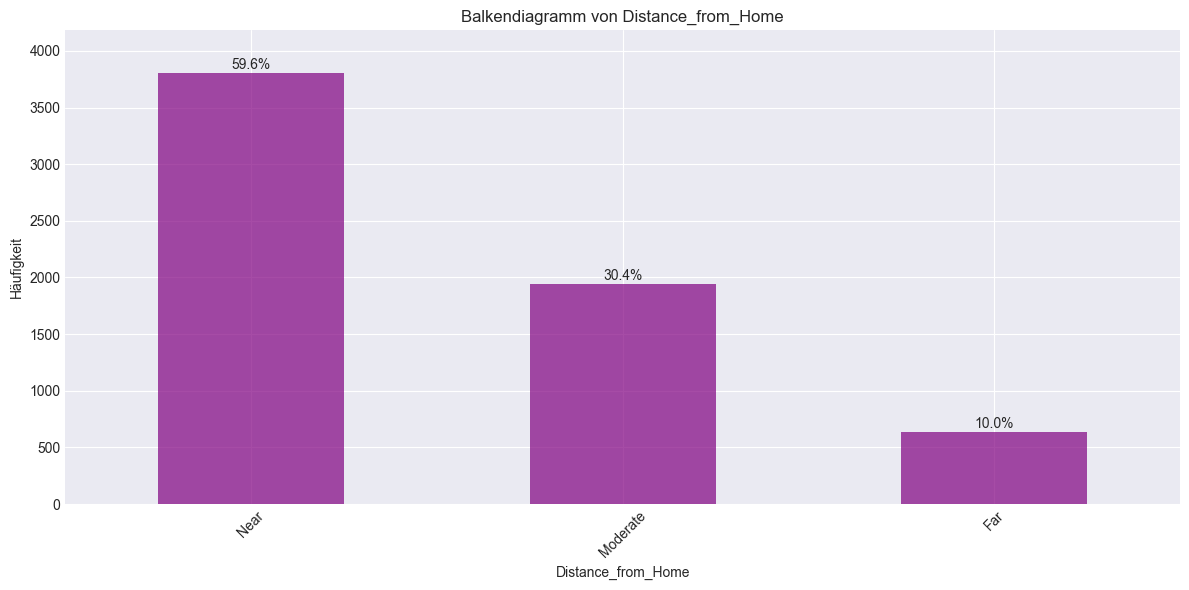

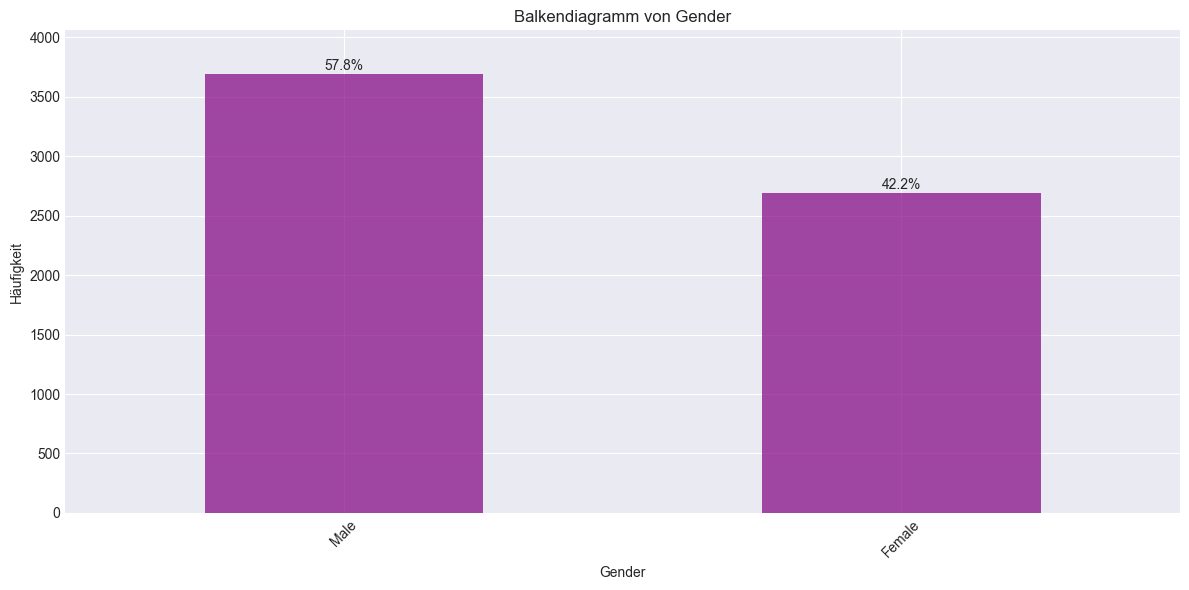

In [6]:
# Verteilung der Zielvariable (Exam_Score) visualisieren
# Histogramm, Box-Plot, etc.
import matplotlib.pyplot as plt

# Histogramm
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(df['Exam_Score'], bins=20, color='blue', alpha=0.7)
plt.title('Histogramm der Exam_Scores')
plt.xlabel('Exam_Score')
plt.ylabel('Häufigkeit')

# Box-Plot
plt.subplot(1, 2, 2)
plt.boxplot(df['Exam_Score'], vert=False)
plt.title('Box-Plot der Exam_Scores')
plt.xlabel('Exam_Score')

plt.tight_layout()
plt.show()

# Verteilung numerischer Features visualisieren
numerical_cols = df.select_dtypes(include=[np.number]).columns
for col in numerical_cols:
    plt.figure(figsize=(12, 5))
    
    # Histogramm
    plt.subplot(1, 2, 1)
    plt.hist(df[col], bins=20, color='green', alpha=0.7)
    plt.title(f'Histogramm von {col}')
    plt.xlabel(col)
    plt.ylabel('Häufigkeit')
    
    # Box-Plot
    plt.subplot(1, 2, 2)
    plt.boxplot(df[col], vert=False)
    plt.title(f'Box-Plot von {col}')
    plt.xlabel(col)
    
    plt.tight_layout()
    plt.show()

# einzelnes Histogramm von previous scores mit anderer BIN-Grösse

plt.subplot(1, 2, 1)
plt.hist(df['Previous_Scores'], bins=10, color='green', alpha=0.7)
plt.title('Histogramm von Previous_Scores')
plt.xlabel('Previous_Scores')

plt.subplot(1, 2, 2)
plt.boxplot(df['Previous_Scores'], vert=False)
plt.title('Box-Plot von Previous_Scores')
plt.xlabel('Previous_Scores')


# Verteilung kategorischer Features visualisieren (Bar Charts)
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    plt.figure(figsize=(12, 6))
    
    # Daten für den Plot vorbereiten
    counts = df[col].value_counts()
    percentages = (counts / counts.sum()) * 100
    
    # Balkendiagramm erstellen
    ax = counts.plot(kind='bar', color='purple', alpha=0.7)
    
    # Prozentzahlen über den Balken hinzufügen
    for i, value in enumerate(counts):
        ax.text(i, value + (counts.max() * 0.01), f'{percentages[i]:.1f}%', ha='center')

    plt.title(f'Balkendiagramm von {col}')
    plt.xlabel(col)
    plt.ylabel('Häufigkeit')
    plt.xticks(rotation=45)
    plt.ylim(0, counts.max() * 1.1) # Y-Achse anpassen, damit der Text Platz hat
    plt.tight_layout()
    plt.show()

Absolut. Ich werde die Balkendiagramme für die kategorialen Features so anpassen, dass die prozentuale Verteilung direkt auf den Balken angezeigt wird. Das macht die Verteilung noch leichter verständlich. 

Using "Replace String in File"




Ich habe die Balkendiagramme für die kategorialen Features so angepasst, dass sie jetzt direkt über den Balken die prozentuale Verteilung anzeigen.

Made changes.

### Beschreibung einiger wichtiger Features

Hier folgt eine detaillierte Beschreibung einiger wichtiger Features im Datensatz. Die Erkenntnisse basieren auf der ersten Inspektion der Daten in den vorherigen Schritten.


- **`Previous_Scores`**:
  - **Beschreibung:** Die Punktzahl, die der Student in früheren Prüfungen erreicht hat. 
  - **Typ:** Fliesskommazahl (float64)
  - **Wertebereich:** 50 bis 99 Punkte. Es ist stark anzunehmen, dass der Test mit 50 Punkten als bestanden galt, da es darunter keine weiteren Werte mehr gibt und es einige mmit knapp 50 Punkten gibt.
  - **Verteilung:** Normalverteilt um einen Mittelwert von ca. 70 Punkten.
  - **Binning:** Im ersten Diagramm mit dem Binning von 20 machte das Balkendiagramm ein Zackenmuster. Mit einem kleineren Binning von 10 verschwindet es wieder. Das liegt an der nicht ganz homogenen Verteilung der Daten und an der zufällig gesetzten Grenze zwischen den Bins.

- **`Exam_Score`** (Zielvariable):
  - **Beschreibung:** Die in der aktuellen Prüfung erreichte Punktzahl. Dies ist die Variable, die wir vorhersagen wollen.
  Es ist stark anzunehmen, dass diese Prüfung mit 55 Punkten als bestanden gilt, da es darunter keine weiteren Werte mehr gibt und doch einige bei knapp 55 Punkten liegen.
  - **Typ:** Fliesskommazahl (float64)
  - **Wertebereich:** 55 bis 101 Punkte.
  - **Verteilung:** Normalverteilt mit einem leichten Schwerpunkt im Bereich von 60-80 Punkten.

### 3.4 Bivariate Analyse

Analyse der Beziehung zwischen Features und der Zielvariable

---

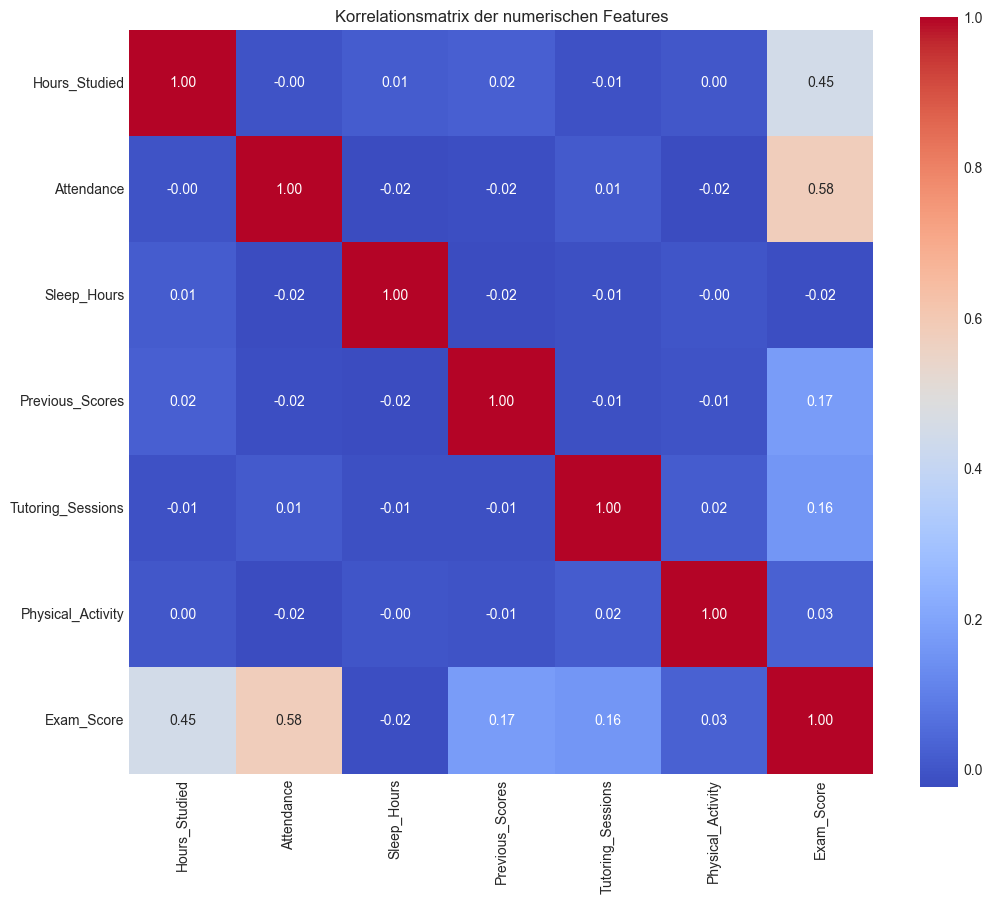


=== Chi2 Scores für kategoriale Features ===
                            chi2_score       p_value
Learning_Disabilities        71.668972  1.008173e-14
Parental_Involvement         26.084300  3.042985e-05
Access_to_Resources          21.236469  2.842493e-04
Peer_Influence               20.343342  4.271865e-04
Distance_from_Home           12.314068  1.516237e-02
Extracurricular_Activities   11.072431  2.576194e-02
Teacher_Quality               8.128561  8.698076e-02
Parental_Education_Level      7.629979  1.061125e-01
Motivation_Level              3.788353  4.354062e-01
Gender                        2.581809  6.300489e-01
Family_Income                 2.098496  7.176487e-01
Internet_Access               1.185810  8.804293e-01
School_Type                   0.570189  9.663180e-01


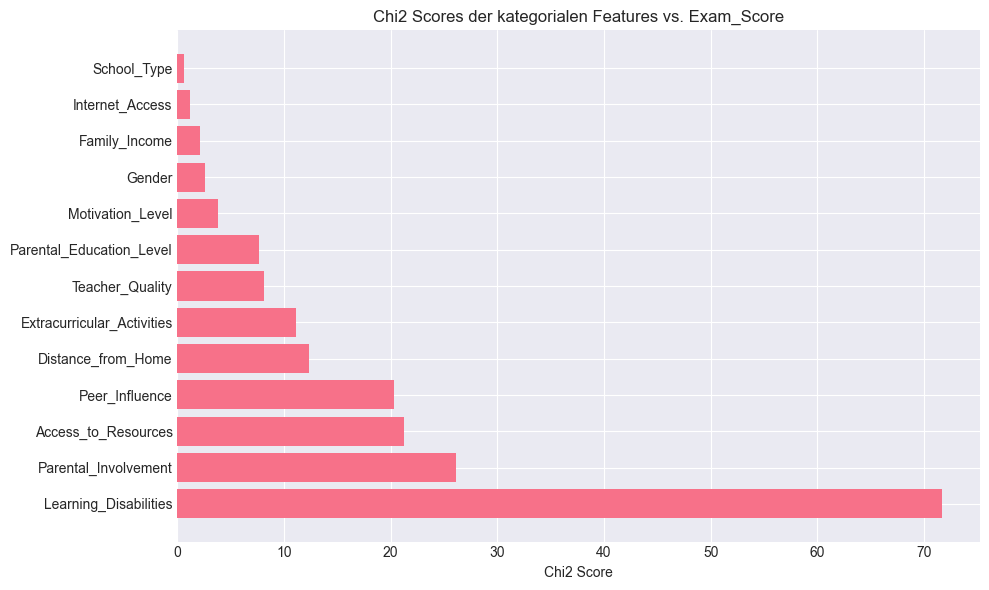

In [7]:
# Korrelationsmatrix für numerische Features erstellen
plt.figure(figsize=(12, 10))
# Nur numerische Spalten für Korrelationsmatrix verwenden
df_numeric = df.select_dtypes(include=[np.number])
correlation_matrix = df_numeric.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Korrelationsmatrix der numerischen Features')
plt.show()

# chi2 score für kategoriale Features berechnen
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2

# Kategoriale Features vorbereiten
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# Label Encoding für kategoriale Features
chi2_scores = {}
le = LabelEncoder()

for col in categorical_cols:
    # Features encodieren
    X_encoded = le.fit_transform(df[col])
    # Target in Bins umwandeln für chi2 (chi2 benötigt nicht-negative Werte)
    # Wir erstellen Bins für Exam_Score
    y_binned = pd.cut(df['Exam_Score'], bins=5, labels=False)
    
    # Chi2 Score berechnen
    chi2_score, p_value = chi2(X_encoded.reshape(-1, 1), y_binned)
    chi2_scores[col] = {'chi2_score': chi2_score[0], 'p_value': p_value[0]}

# Ergebnisse als DataFrame darstellen
chi2_df = pd.DataFrame(chi2_scores).T.sort_values('chi2_score', ascending=False)
print("\n=== Chi2 Scores für kategoriale Features ===")
print(chi2_df)

# Visualisierung der Chi2 Scores
plt.figure(figsize=(10, 6))
plt.barh(chi2_df.index, chi2_df['chi2_score'])
plt.xlabel('Chi2 Score')
plt.title('Chi2 Scores der kategorialen Features vs. Exam_Score')
plt.tight_layout()
plt.show()


### Interpretation der Korrelationsmatrix und Chi2-Scores

**Numerische Features (Korrelationsmatrix):**

Die Korrelationsmatrix zeigt folgende wichtige Zusammenhänge mit `Exam_Score`:

1. **Attendance (0.58)** - Stärkste positive Korrelation
   - Höhere Anwesenheit korreliert stark mit besseren Prüfungsergebnissen
   - Dies unterstreicht die Bedeutung der regelmässigen Teilnahme am Unterricht

2. **Hours_Studied (0.45)** - Zweitstärkste Korrelation
   - Mehr Lernzeit führt zu besseren Noten
   - Erwartungsgemäss ein wichtiger Einflussfaktor

3. **Previous_Scores (0.17)** und **Tutoring_Sessions (0.16)** - Moderate Korrelationen
   - Frühere Leistungen und zusätzliche Unterstützung zeigen positive Effekte
   - Der Effekt ist jedoch schwächer als erwartet

4. **Sleep_Hours (-0.02)** und **Physical_Activity (0.03)** - Keine signifikante Korrelation
   - Überraschenderweise zeigen diese Lifestyle-Faktoren kaum Zusammenhang mit der Prüfungsleistung
   - Möglicherweise sind die Unterschiede in der Stichprobe zu gering

**Kategoriale Features (Chi2-Scores):**

Die Chi2-Scores zeigen die statistische Abhängigkeit zwischen kategorialen Features und `Exam_Score` (in Bins):

**Hochsignifikante Features (p < 0.01):**

1. **Learning_Disabilities (71.67, p ≈ 0)** - **Wichtigstes kategoriales Feature**
   - Sehr starker Zusammenhang mit Prüfungsleistung
   - Lernbehinderungen haben einen massiven Einfluss auf die Exam_Score

2. **Parental_Involvement (26.08, p < 0.001)** - **Zweitwichtigstes Feature**
   - Elterliche Unterstützung zeigt starken positiven Effekt
   - Deutlich wichtiger als sozioökonomische Faktoren

3. **Access_to_Resources (21.24, p < 0.001)** - **Drittwichtigstes Feature**
   - Zugang zu Lernmaterialien ist entscheidend für den Erfolg

4. **Peer_Influence (20.34, p < 0.001)**
   - Der Einfluss von Mitschülern spielt eine wichtige Rolle

**Signifikante Features (p < 0.05):**

5. **Distance_from_Home (12.31, p = 0.015)**
   - Entfernung zur Schule hat einen messbaren Effekt
   
6. **Extracurricular_Activities (11.07, p = 0.026)**
   - Ausserschulische Aktivitäten zeigen einen Zusammenhang

**Nicht signifikante Features (p > 0.05):**

- **Teacher_Quality (8.13, p = 0.087)** - Grenzwertig
- **Parental_Education_Level (7.63, p = 0.106)** - Überraschend schwach
- **Motivation_Level (3.79, p = 0.435)** - Kein signifikanter Zusammenhang
- **Gender (2.58, p = 0.630)** - Keine geschlechtsspezifischen Unterschiede
- **Family_Income (2.10, p = 0.718)** - Sozioökonomischer Status zeigt keinen klaren Effekt
- **Internet_Access (1.19, p = 0.880)** - Nahezu keine Bedeutung
- **School_Type (0.57, p = 0.966)** - Kein Unterschied zwischen Schultypen



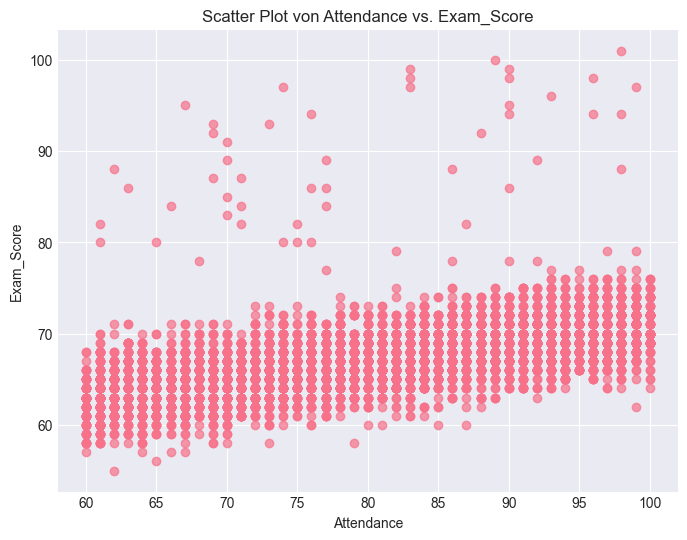

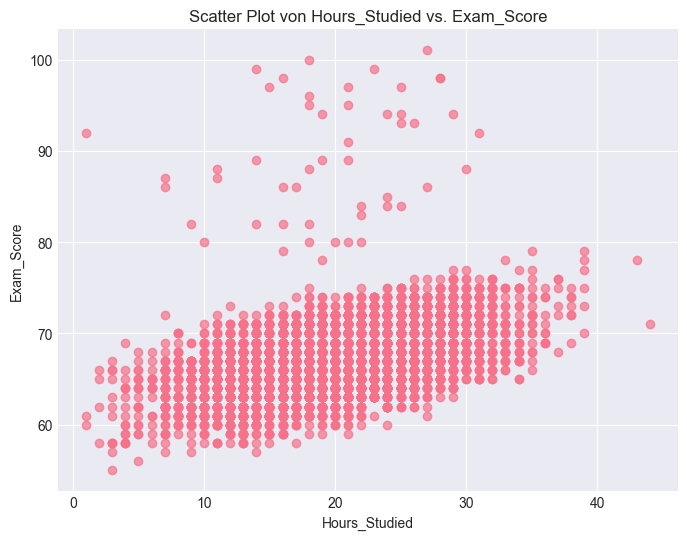

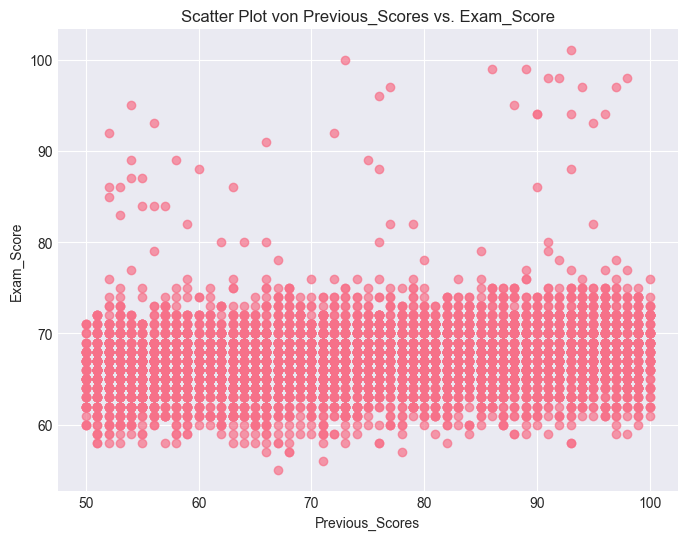

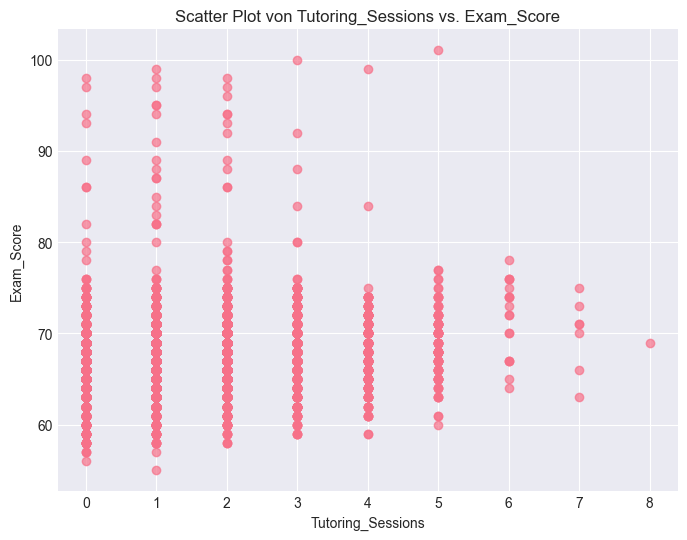

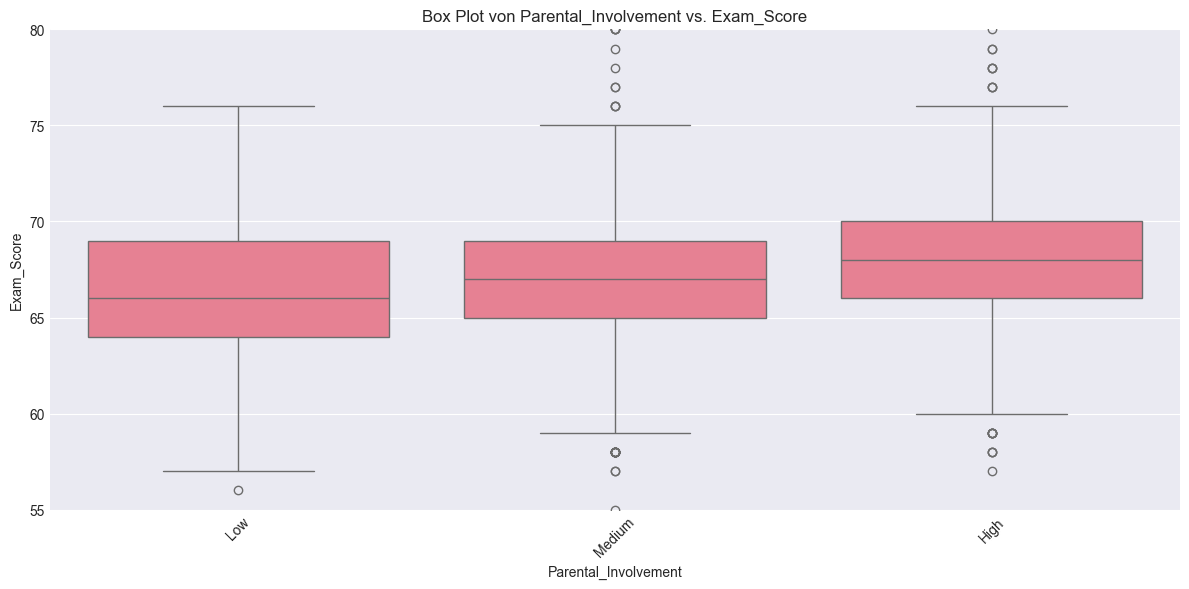

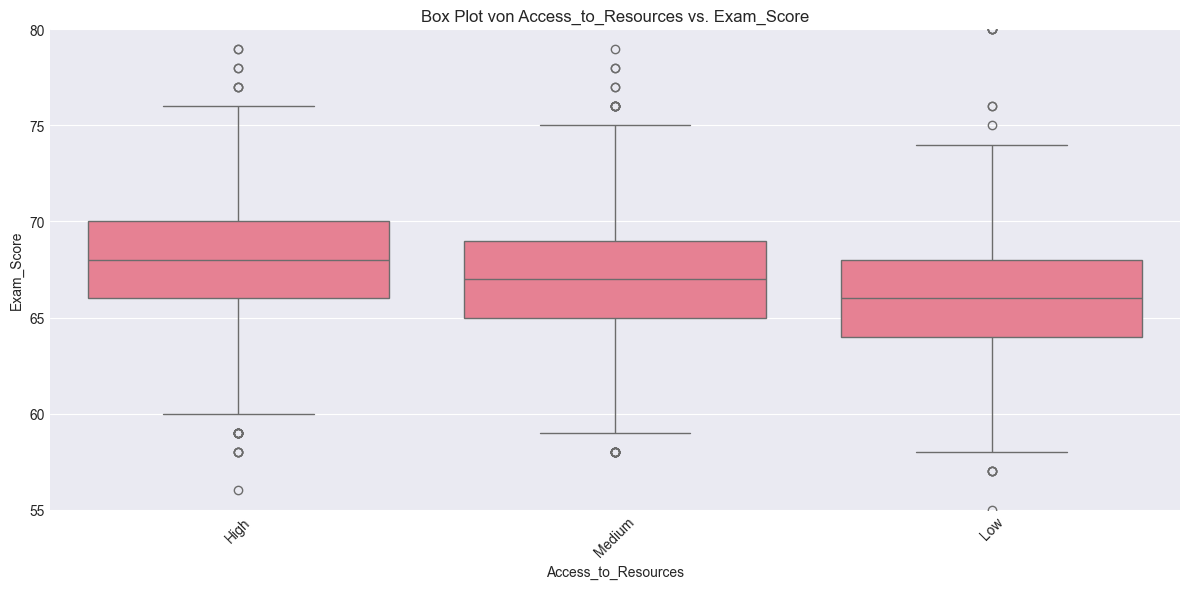

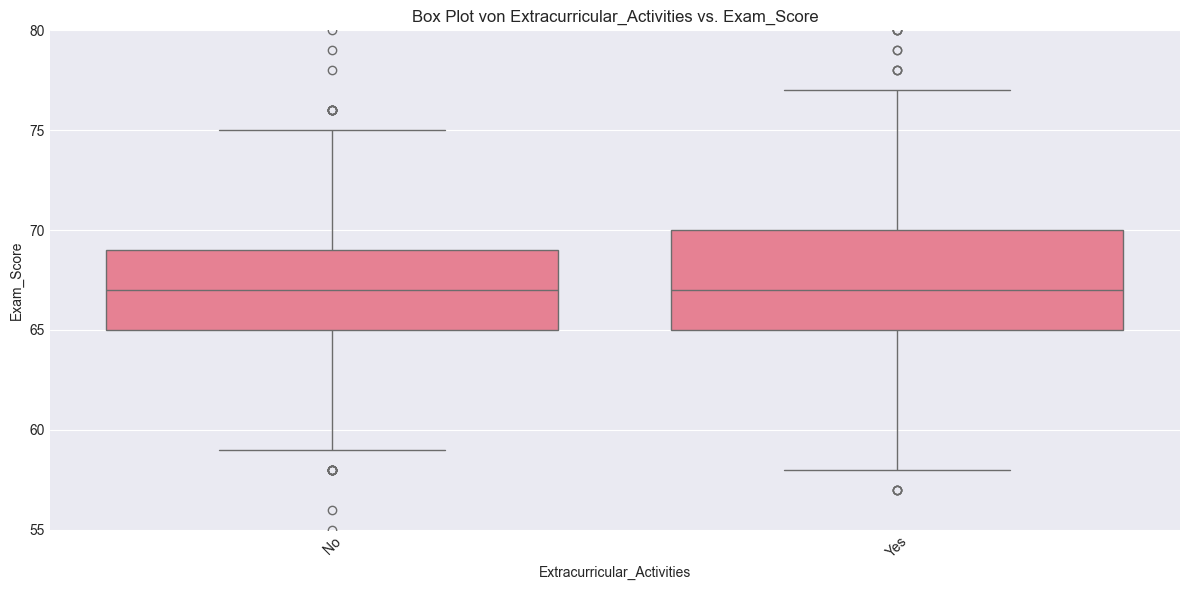

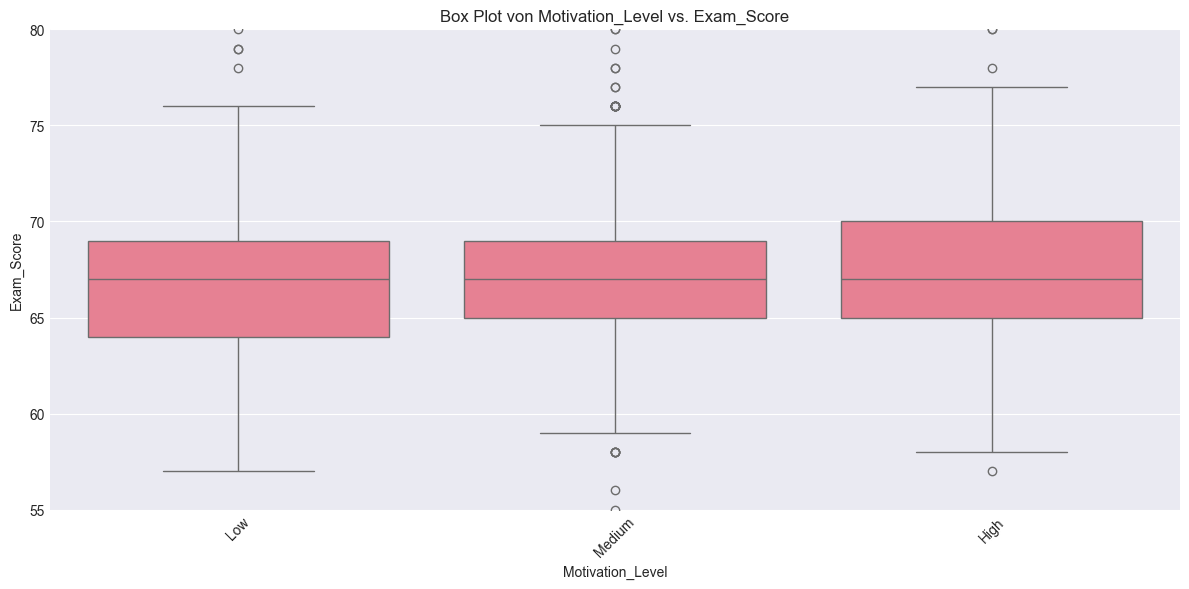

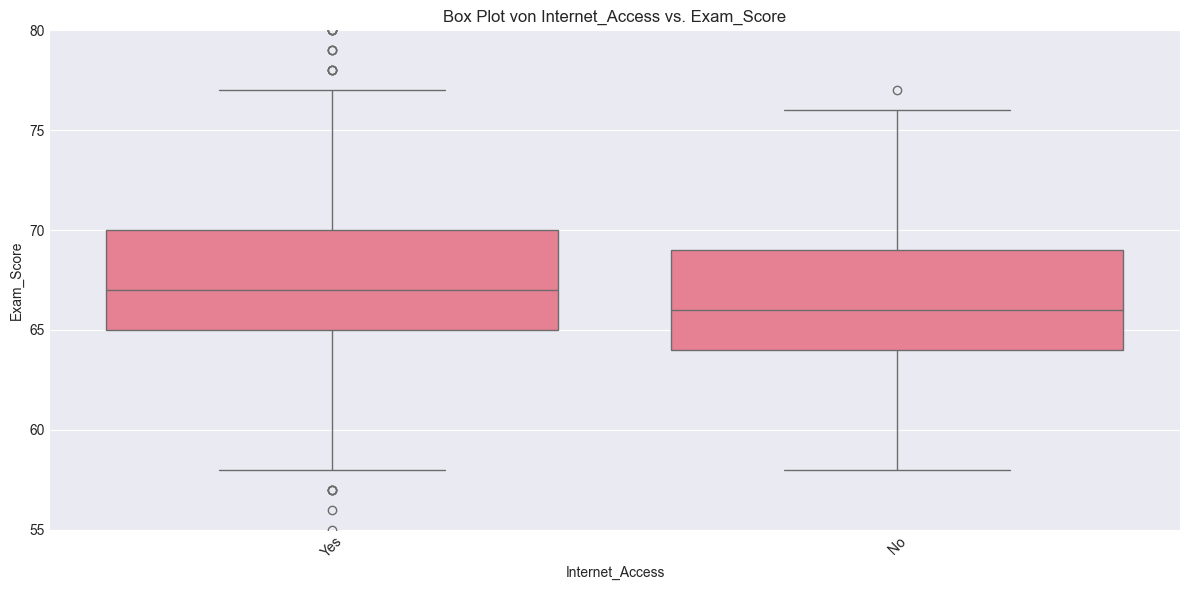

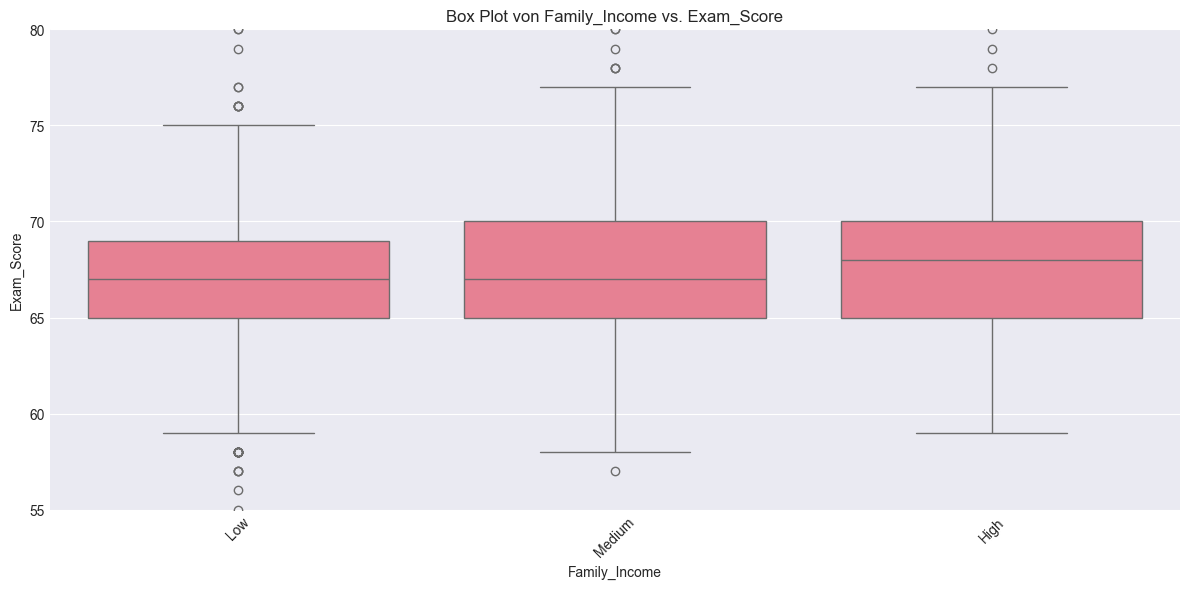

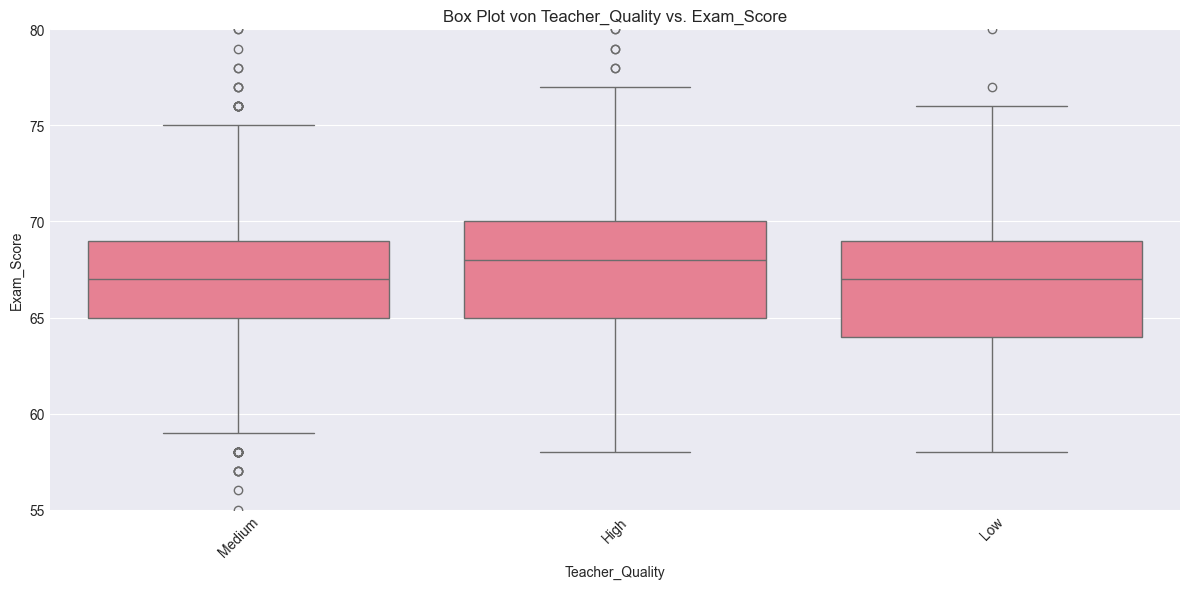

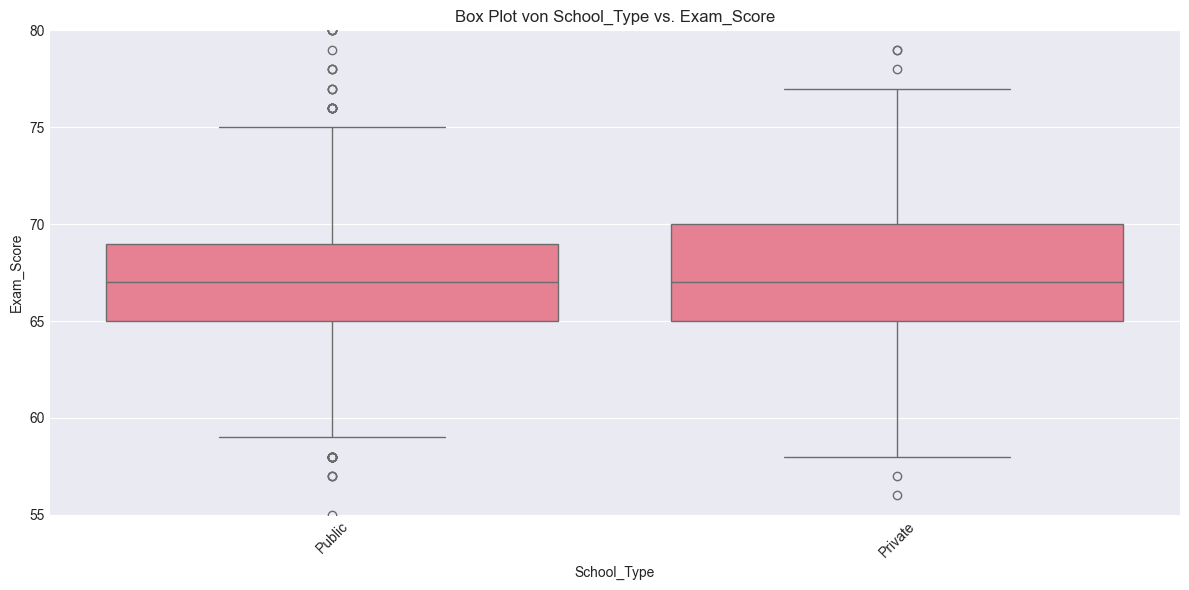

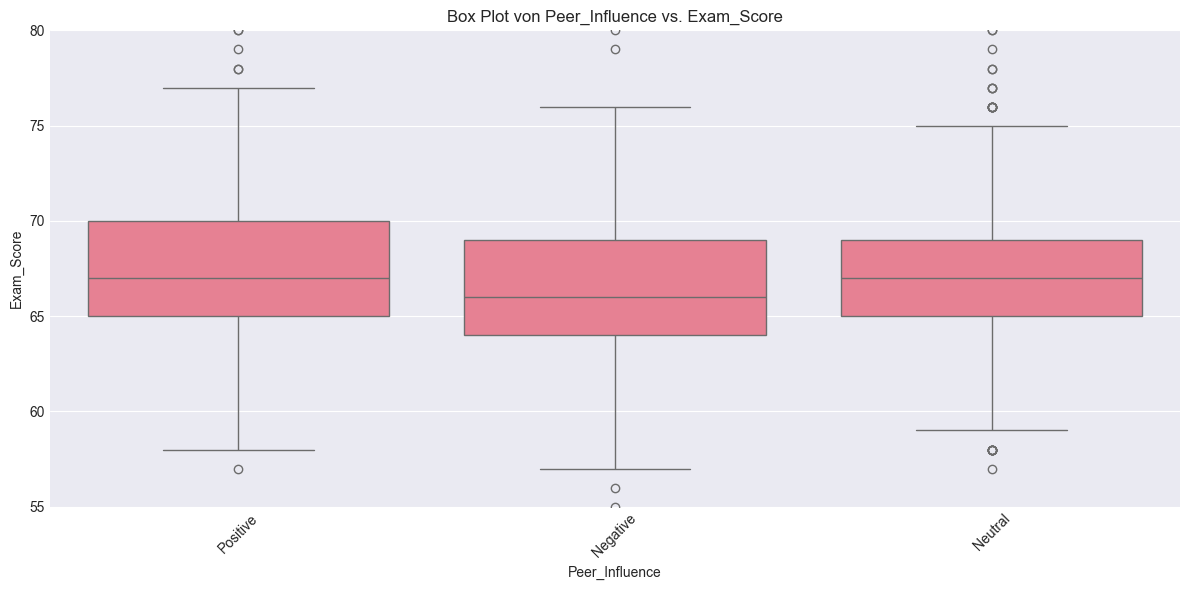

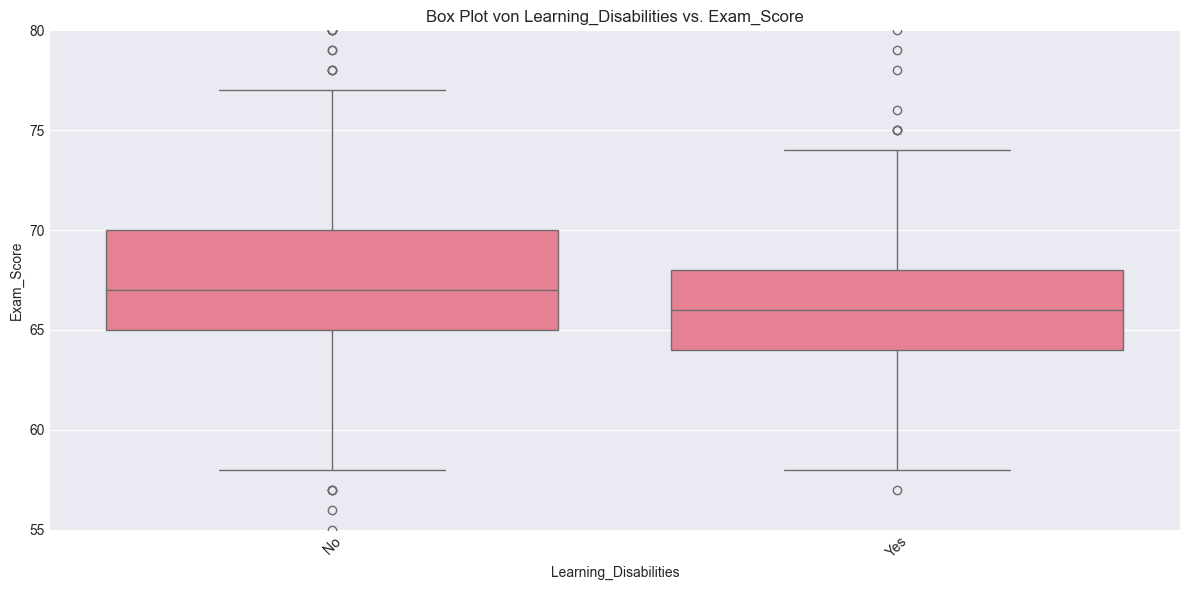

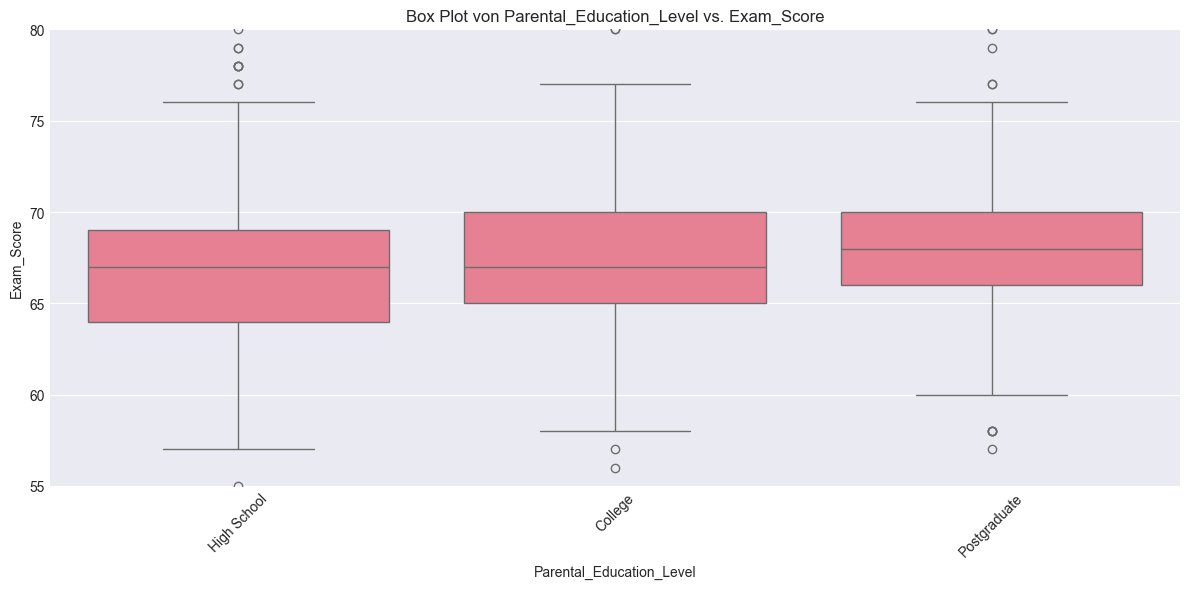

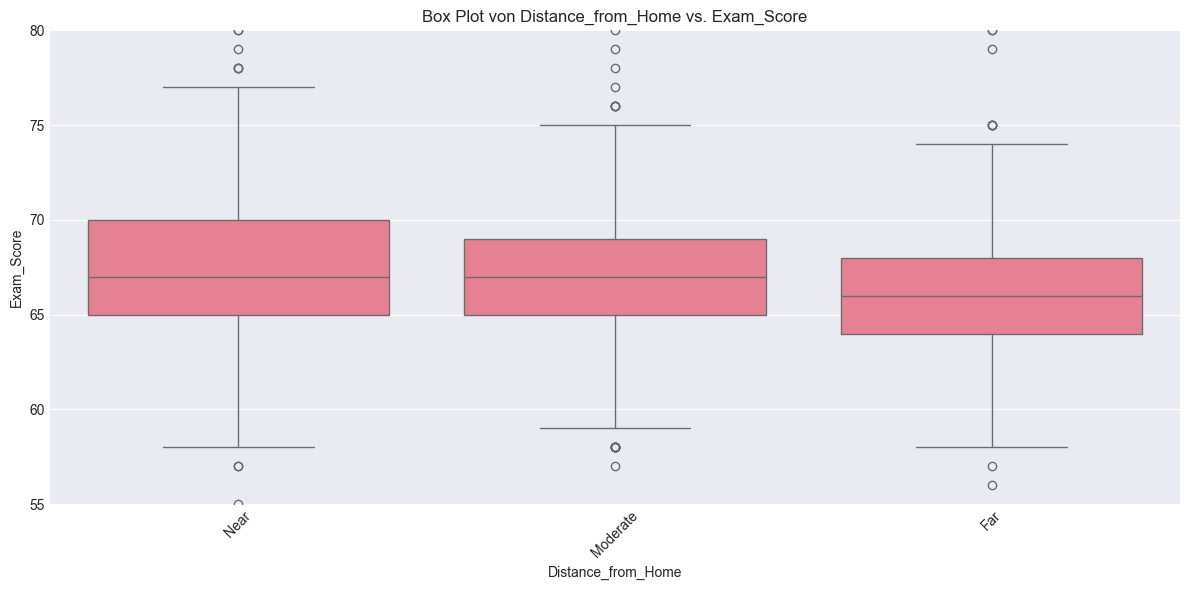

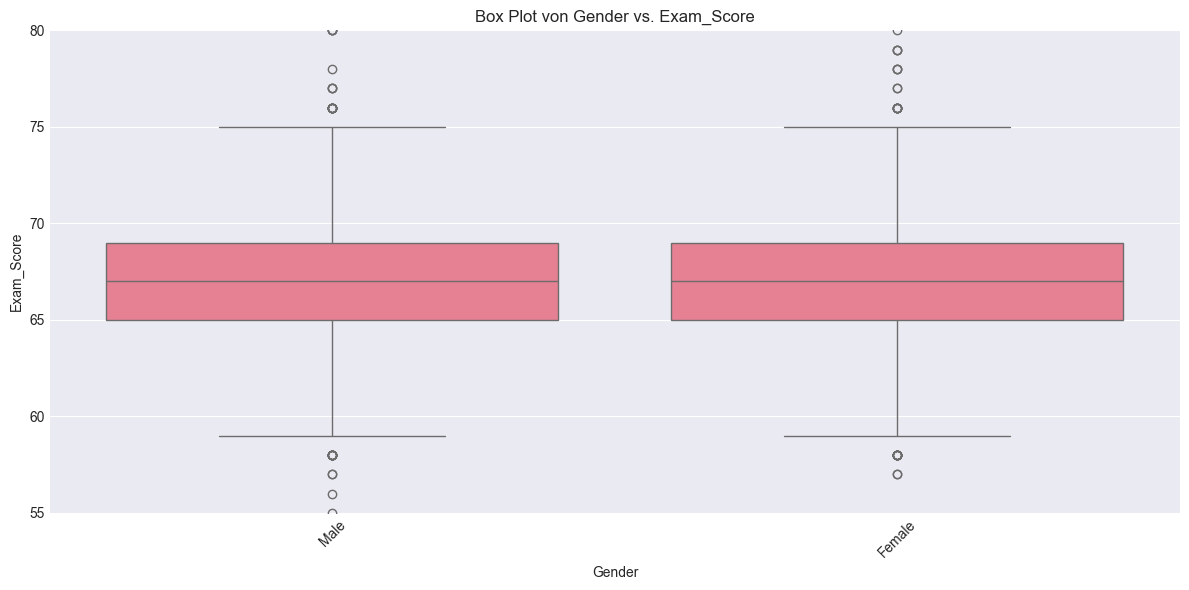

In [8]:
# Scatter Plots für wichtigste numerische Features vs. Exam_Score
important_features = correlation_matrix['Exam_Score'].abs().nlargest(5).index
for col in important_features:
    if col != 'Exam_Score':
        plt.figure(figsize=(8, 6))
        plt.scatter(df[col], df['Exam_Score'], alpha=0.7)
        plt.title(f'Scatter Plot von {col} vs. Exam_Score')
        plt.xlabel(col)
        plt.ylabel('Exam_Score')
        plt.show()

# box Plots für kategorische Features vs. Exam_Score
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols: 
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=col, y='Exam_Score', data=df)
    plt.title(f'Box Plot von {col} vs. Exam_Score')
    plt.xlabel(col)
    plt.ylabel('Exam_Score')
    plt.ylim(55, 80)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


### 3.6 Wichtigste Erkenntnisse aus der EDA

**Zusammenfassung der EDA-Ergebnisse:**

---

**Wichtigste Erkenntnisse:**

1. **Verhaltensfaktoren dominieren**: Attendance und Hours_Studied sind die wichtigsten numerischen Prädiktoren
2. **Lernbehinderungen sind der kritischste Faktor**: Mit Abstand höchster Chi2-Score
3. **Soziale Unterstützung ist wichtiger als Einkommen**: Parental_Involvement und Access_to_Resources schlagen Family_Income deutlich
4. **Überraschungen**: 
   - Motivation_Level zeigt keinen signifikanten Effekt 
   - Parental_Education_Level ist weniger wichtig als erwartet
   - Sleep_Hours und Physical_Activity haben praktisch keinen Einfluss
5. **Strukturelle Faktoren sind weniger wichtig**: School_Type und Internet_Access spielen kaum eine Rolle

**Implikationen für die Modellierung:**
- Fokus auf Attendance, Hours_Studied, Learning_Disabilities, Parental_Involvement und Access_to_Resources


6. **Folgende Features haben wir ausgewählt um sie in unserem Modell zu berücksichtigen:**

   **Numerische Features (4):**
   - `Hours_Studied` - Zweitwichtigster numerischer Prädiktor (Korrelation: 0.45)
   - `Attendance` - Wichtigster numerischer Prädiktor (Korrelation: 0.58)
   - `Previous_Scores` - Moderate Korrelation (0.17)
   - `Tutoring_Sessions` - Moderate Korrelation (0.16)

   **Kategoriale Features (6):**
   - `Learning_Disabilities` - Höchster Chi2-Score (71.67, p ≈ 0)
   - `Parental_Involvement` - Sehr signifikant (26.08, p < 0.001)
   - `Access_to_Resources` - Sehr signifikant (21.24, p < 0.001)
   - `Peer_Influence` - Sehr signifikant (20.34, p < 0.001)
   - `Distance_from_Home` - Signifikant (12.31, p = 0.015)
   - `Extracurricular_Activities` - Signifikant (11.07, p = 0.026)

   **Total: 10 Features** (von ursprünglich 20 Features im Datensatz)

   **Ausgeschlossene Features (10):**
   - `Sleep_Hours` - Keine Korrelation (-0.02)
   - `Physical_Activity` - Keine Korrelation (0.03)
   - `Teacher_Quality` - Nicht signifikant (p = 0.087)
   - `Parental_Education_Level` - Nicht signifikant (p = 0.106)
   - `Motivation_Level` - Nicht signifikant (p = 0.435)
   - `Gender` - Nicht signifikant (p = 0.630)
   - `Family_Income` - Nicht signifikant (p = 0.718)
   - `Internet_Access` - Nicht signifikant (p = 0.880)
   - `School_Type` - Nicht signifikant (p = 0.966)
   - `Exam_Score` - Zielvariable (wird separat behandelt)

   **Begründung der Auswahl:**
   - Alle ausgewählten Features zeigen entweder eine substantielle Korrelation (|r| > 0.15) oder statistische Signifikanz (p < 0.05)
   - Ausgeschlossene Features zeigen keine statistisch nachweisbare Beziehung zur Zielvariable
   - Diese Reduktion von 20 auf 10 Features verbessert die Modellinterpretierbarkeit und reduziert Overfitting-Risiko


---

## (d) Pipeline

### 4.1 Data Preprocessing und Feature Engineering

---

In [25]:
# Features & target
X = df.drop(columns=["Exam_Score"])
y = df["Exam_Score"]
y_log = np.log(y)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.2, random_state=42)

In [10]:
# TODO: Scaling überarbeiten, verstehen und erklären

# Select only numeric columns (int or float)
numeric_cols = ['Hours_Studied', 'Attendance', 'Previous_Scores', 'Tutoring_Sessions']

for col in numeric_cols:
    Q1 = X_train[col].quantile(0.25)        # First quartile (25%)
    Q3 = X_train[col].quantile(0.75)        # Third quartile (75%)
    IQR = Q3 - Q1                           # Interquartile Range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Check if any outliers exist in this column
    if ((X_train[col] < lower_bound) | (X_train[col] > upper_bound)).any():
        # Clip outliers into the valid range
        X_train[col] = X_train[col].clip(lower=lower_bound, upper=upper_bound)

# y-train
Q1 = y_train.quantile(0.25)        # First quartile (25%)
Q3 = y_train.quantile(0.75)        # Third quartile (75%)
IQR = Q3 - Q1                      # Interquartile Range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Check if any outliers exist in this column
if ((y_train < lower_bound) | (y_train > upper_bound)).any():
    # Clip outliers into the valid range
    y_train = y_train.clip(lower=lower_bound, upper=upper_bound)

In [28]:
# selected features (use the ones you chose in the EDA)
numerical_features = ['Hours_Studied', 'Attendance', 'Previous_Scores', 'Tutoring_Sessions']
categorical_features = ['Learning_Disabilities', 'Parental_Involvement', 'Access_to_Resources',
                        'Peer_Influence', 'Distance_from_Home', 'Extracurricular_Activities']

# numeric transformer: median impute (if needed) + scaling
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# categorical transformer: most frequent impute + one-hot encode
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# column transformer
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_features),
    ('cat', categorical_transformer, categorical_features)
])

# full pipeline: preprocessor + linear regression
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# fit on training data (y_train is the log-transformed target in your notebook)
pipeline.fit(X_train[numerical_features + categorical_features], y_train)

# predict
y_train_pred = pipeline.predict(X_train[numerical_features + categorical_features])

# metrics
print("Train R² (log):", r2_score(y_train, y_train_pred))

# Evaluate on test set
y_test_pred = pipeline.predict(X_test[numerical_features + categorical_features])
print("Test R² (log):", r2_score(y_test, y_test_pred))

# RMSE (log-space)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print("Test RMSE (log):", rmse_test)

# RMSE in original Exam_Score units
rmse_train_orig = np.sqrt(mean_squared_error(np.exp(y_train), np.exp(y_train_pred)))
rmse_test_orig  = np.sqrt(mean_squared_error(np.exp(y_test),  np.exp(y_test_pred)))
print("Train RMSE (original units):", rmse_train_orig)
print("Test RMSE (original units):", rmse_test_orig)
# some sklearn versions don't accept the 'squared' keyword; compute RMSE explicitly
rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
print("Train RMSE:", rmse)

Train R² (log): 0.7266969732113105
Test R² (log): 0.7515642813863562
Test RMSE (log): 0.02831852586920215
Train RMSE (original units): 2.22823666271845
Test RMSE (original units): 2.151238185561723
Train RMSE: 0.029338555606375303


Polynomial Regression (degree=2) results:
Train R² (log): 0.7273, Test R² (log): 0.7511
Train RMSE (log): 0.029307, Test RMSE (log): 0.028346
Train RMSE (original units): 2.2262, Test RMSE (original units): 2.1527


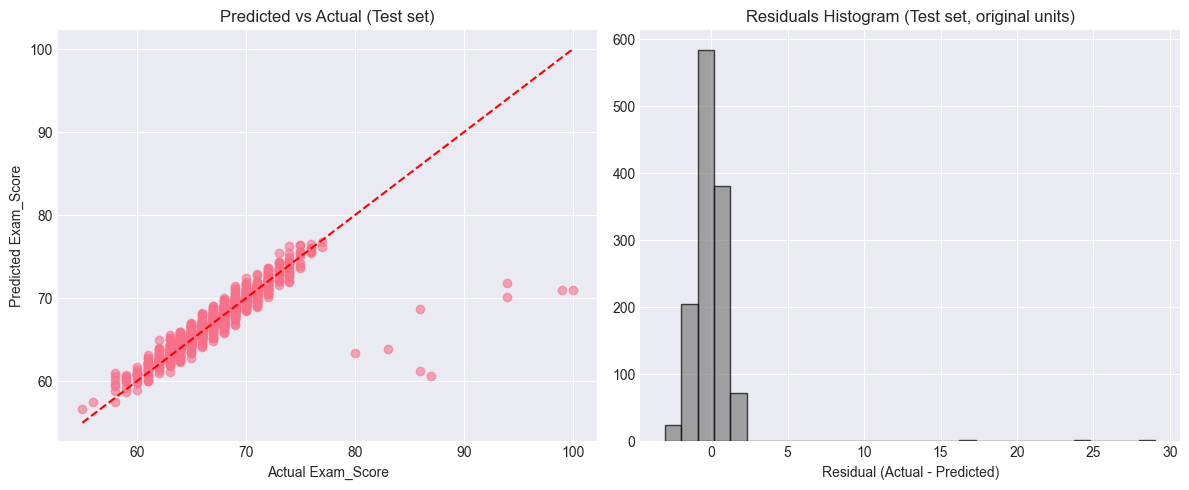

In [23]:
# Polynomial Regression (degree=2) on selected features

# build numeric pipeline with polynomial features after scaling
numeric_transformer_poly = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2, include_bias=False))
])

# reuse categorical_transformer defined earlier
preprocessor_poly = ColumnTransformer(transformers=[
    ('num', numeric_transformer_poly, numerical_features),
    ('cat', categorical_transformer, categorical_features)
])

# full pipeline: preprocessor + linear regressor (polynomial regression)
pipeline_poly = Pipeline(steps=[
    ('preprocessor', preprocessor_poly),
    ('regressor', LinearRegression())
])

# fit on training data (y_train is log-transformed target)
pipeline_poly.fit(X_train[numerical_features + categorical_features], y_train)

# predictions (log-space)
y_train_pred_poly = pipeline_poly.predict(X_train[numerical_features + categorical_features])
y_test_pred_poly  = pipeline_poly.predict(X_test[numerical_features + categorical_features])

# Metrics on log-scale
r2_train_poly = r2_score(y_train, y_train_pred_poly)
r2_test_poly  = r2_score(y_test, y_test_pred_poly)
rmse_train_log = np.sqrt(mean_squared_error(y_train, y_train_pred_poly))
rmse_test_log  = np.sqrt(mean_squared_error(y_test, y_test_pred_poly))

# Convert back to original scale and compute RMSE in exam score units
rmse_train_orig = np.sqrt(mean_squared_error(np.exp(y_train), np.exp(y_train_pred_poly)))
rmse_test_orig  = np.sqrt(mean_squared_error(np.exp(y_test),  np.exp(y_test_pred_poly)))

print("Polynomial Regression (degree=2) results:")
print(f"Train R² (log): {r2_train_poly:.4f}, Test R² (log): {r2_test_poly:.4f}")
print(f"Train RMSE (log): {rmse_train_log:.6f}, Test RMSE (log): {rmse_test_log:.6f}")
print(f"Train RMSE (original units): {rmse_train_orig:.4f}, Test RMSE (original units): {rmse_test_orig:.4f}")

# Quick diagnostic plots (original scale)
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(np.exp(y_test), np.exp(y_test_pred_poly), alpha=0.6)
lims = [min(np.exp(y_test).min(), np.exp(y_test_pred_poly).min()),
        max(np.exp(y_test).max(), np.exp(y_test_pred_poly).max())]
plt.plot(lims, lims, '--', color='red')
plt.xlabel('Actual Exam_Score')
plt.ylabel('Predicted Exam_Score')
plt.title('Predicted vs Actual (Test set)')

plt.subplot(1,2,2)
residuals = np.exp(y_test) - np.exp(y_test_pred_poly)
plt.hist(residuals, bins=30, color='gray', edgecolor='k', alpha=0.7)
plt.title('Residuals Histogram (Test set, original units)')
plt.xlabel('Residual (Actual - Predicted)')

plt.tight_layout()
plt.show()

   degree  r2_train   r2_test  rmse_train  rmse_test
0       1  0.726697  0.751564    0.029339   0.028319
1       2  0.727290  0.751086    0.029307   0.028346
2       3  0.728799  0.750040    0.029226   0.028405
3       4  0.730737  0.747496    0.029121   0.028549


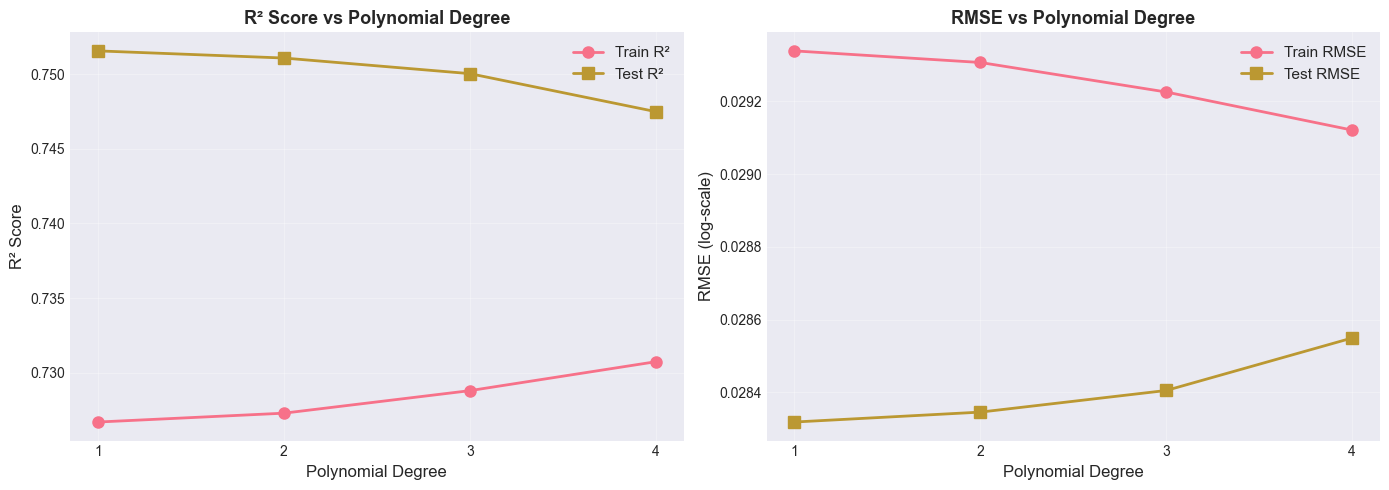

In [ ]:
#Frage Herr Würsch

# Polynomial Regression mit verschiedenen Graden testen
degrees = range(1, 5)
results = {'degree': [], 'r2_train': [], 'r2_test': [], 'rmse_train': [], 'rmse_test': []}

for degree in degrees:
    # Build numeric pipeline with polynomial features
    numeric_transformer_temp = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler()),
        ('poly', PolynomialFeatures(degree=degree, include_bias=False))
    ])
    
    preprocessor_temp = ColumnTransformer(transformers=[
        ('num', numeric_transformer_temp, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])
    
    pipeline_temp = Pipeline(steps=[
        ('preprocessor', preprocessor_temp),
        ('regressor', LinearRegression())
    ])
    
    # Fit and predict
    pipeline_temp.fit(X_train[numerical_features + categorical_features], y_train)
    y_train_pred_temp = pipeline_temp.predict(X_train[numerical_features + categorical_features])
    y_test_pred_temp = pipeline_temp.predict(X_test[numerical_features + categorical_features])
    
    # Calculate metrics
    r2_train = r2_score(y_train, y_train_pred_temp)
    r2_test = r2_score(y_test, y_test_pred_temp)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred_temp))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred_temp))
    
    results['degree'].append(degree)
    results['r2_train'].append(r2_train)
    results['r2_test'].append(r2_test)
    results['rmse_train'].append(rmse_train)
    results['rmse_test'].append(rmse_test)

# Convert to DataFrame for better visualization
results_df = pd.DataFrame(results)
print(results_df)

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# R² Score Plot
axes[0].plot(results_df['degree'], results_df['r2_train'], 'o-', label='Train R²', linewidth=2, markersize=8)
axes[0].plot(results_df['degree'], results_df['r2_test'], 's-', label='Test R²', linewidth=2, markersize=8)
axes[0].set_xlabel('Polynomial Degree', fontsize=12)
axes[0].set_ylabel('R² Score', fontsize=12)
axes[0].set_title('R² Score vs Polynomial Degree', fontsize=13, fontweight='bold')
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3)
axes[0].set_xticks(degrees)

# RMSE Plot
axes[1].plot(results_df['degree'], results_df['rmse_train'], 'o-', label='Train RMSE', linewidth=2, markersize=8)
axes[1].plot(results_df['degree'], results_df['rmse_test'], 's-', label='Test RMSE', linewidth=2, markersize=8)
axes[1].set_xlabel('Polynomial Degree', fontsize=12)
axes[1].set_ylabel('RMSE (log-scale)', fontsize=12)
axes[1].set_title('RMSE vs Polynomial Degree', fontsize=13, fontweight='bold')
axes[1].legend(fontsize=11)
axes[1].grid(True, alpha=0.3)
axes[1].set_xticks(degrees)

plt.tight_layout()
plt.show()

### 4.2 Pipeline Aufbau

Erstellung einer ML-Pipeline für automatisierte und reproduzierbare Datenverarbeitung

---

In [14]:
# TODO: Numerische und kategorische Features identifizieren
# numerical_features = [...]
# categorical_features = [...]

# TODO: Preprocessing Pipeline für numerische Features erstellen
# numerical_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='median')),
#     ('scaler', StandardScaler())
# ])

# TODO: Preprocessing Pipeline für kategorische Features erstellen
# categorical_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='most_frequent')),
#     ('encoder', OneHotEncoder(handle_unknown='ignore'))
# ])

# TODO: ColumnTransformer erstellen
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', numerical_transformer, numerical_features),
#         ('cat', categorical_transformer, categorical_features)
#     ])

# TODO: Pipeline mit Preprocessor testen
# preprocessor.fit(X_train)
# X_train_transformed = preprocessor.transform(X_train)

---

## (e) No Free Lunch

### 5.1 Auswahl geeigneter Lernalgorithmen

Gemäss dem **No Free Lunch Theorem** gibt es keinen universell besten Algorithmus. Verschiedene Algorithmen müssen für dieses spezifische Problem getestet werden.

**Ausgewählte Algorithmen für dieses Regressionsproblem:**

1. **Linear Regression** - Baseline-Modell, schnell und interpretierbar
2. **Ridge Regression** - Regularisierte lineare Regression (L2)
3. **Lasso Regression** - Regularisierte lineare Regression (L1, Feature Selection)
4. **ElasticNet** - Kombination aus Ridge und Lasso
5. **Decision Tree Regressor** - Nicht-lineares Modell, interpretierbar
6. **Random Forest Regressor** - Ensemble-Methode, robust
7. **Gradient Boosting Regressor** - Leistungsstarkes Ensemble-Modell
8. **Support Vector Regressor (SVR)** - Kernel-basiertes Modell
9. **K-Nearest Neighbors (KNN)** - Instanz-basiertes Lernen

---

In [15]:
# TODO: Random Forest
# ggf. TODO: Mehrdimsional ...

In [ ]:
#Frage Herr Würsch

from sklearn.model_selection import RandomizedSearchCV
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor


param_dist = {
    'regressor__n_estimators': [100, 200, 400],
    'regressor__max_depth': [5, 10, 15, None],
    'regressor__min_samples_leaf': [1, 5, 10, 20],
    'regressor__max_features': ['sqrt', 'log2', 0.3, 0.5],
    'regressor__bootstrap': [True, False]
}

# Use the preprocessor defined earlier and a regressor step named 'regressor' so the param grid matches
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=0))
])

rnd_search = RandomizedSearchCV(
    rf_pipeline,
    param_distributions=param_dist,
    n_iter=50,  # reduce iterations if needed for speed
    cv=10,
    scoring='r2',
    n_jobs=-1,
    random_state=42,
    verbose=1,
    refit=True
)

rnd_search.fit(X_train[numerical_features + categorical_features], y_train)
print("Best CV R²:", rnd_search.best_score_)

# RMSE und R² auf Testdaten (log-space)
y_test_pred_rf = rnd_search.predict(X_test[numerical_features + categorical_features])
rmse_test_rf_log = np.sqrt(mean_squared_error(y_test, y_test_pred_rf))
r2_test_rf = r2_score(y_test, y_test_pred_rf)
print(f"Test RMSE (log): {rmse_test_rf_log:.4f}")
print(f"Test R² (log): {r2_test_rf:.4f}")

# RMSE auf originaler Skala
rmse_test_rf_orig = np.sqrt(mean_squared_error(np.exp(y_test), np.exp(y_test_pred_rf)))
print(f"Test RMSE (original units): {rmse_test_rf_orig:.4f}")
print("Best params:", rnd_search.best_params_)

best_rf = rnd_search.best_estimator_

# Permutation importance (auf Testset)
perm = permutation_importance(best_rf, X_test[numerical_features + categorical_features], y_test,
                              n_repeats=10, random_state=42, n_jobs=-1)
importances = perm.importances_mean

# Feature names must match the columns passed to permutation_importance (original input columns)
feature_names = numerical_features + categorical_features

imp_df = pd.DataFrame({'feature': feature_names, 'perm_importance': importances})
print(imp_df.sort_values('perm_importance', ascending=False).head(15))



Fitting 10 folds for each of 50 candidates, totalling 500 fits
Best CV R²: 0.6840519236066638
Test RMSE (log): 0.0307
Test R² (log): 0.7081
Test RMSE (original units): 2.2909
Best params: {'regressor__n_estimators': 400, 'regressor__min_samples_leaf': 5, 'regressor__max_features': 0.5, 'regressor__max_depth': 15, 'regressor__bootstrap': True}
                      feature  perm_importance
1                  Attendance         0.698683
0               Hours_Studied         0.386686
2             Previous_Scores         0.056803
6         Access_to_Resources         0.044490
5        Parental_Involvement         0.041171
3           Tutoring_Sessions         0.028097
7              Peer_Influence         0.009705
8          Distance_from_Home         0.006235
9  Extracurricular_Activities         0.003022
4       Learning_Disabilities         0.002065


---

## (f) Validierung

### 6.1 Kreuzvalidierung der Modelle

Verwendung von K-Fold Cross-Validation für robuste Performance-Bewertung

---

In [17]:
# TODO: Funktion zur Evaluation aller Modelle mit Cross-Validation erstellen

# TODO: Für jedes Modell:
# - Pipeline erstellen (Preprocessor + Modell)
# - Cross-Validation durchführen (z.B. 5-Fold oder 10-Fold)
# - RMSE, MAE, R² berechnen
# - Ergebnisse speichern

# TODO: Ergebnisse in DataFrame sammeln und sortieren

# TODO: Visualisierung der Modell-Performance (Barplot)

### 6.2 Hyperparameter-Tuning

Optimierung des besten Modells durch systematische Hyperparameter-Suche

---

In [18]:
# TODO: Bestes Modell aus Cross-Validation auswählen

# TODO: Hyperparameter-Grid definieren für das beste Modell
# param_grid = {
#     'regressor__parameter1': [...],
#     'regressor__parameter2': [...],
# }

# TODO: GridSearchCV oder RandomizedSearchCV durchführen
# grid_search = GridSearchCV(
#     pipeline,
#     param_grid,
#     cv=5,
#     scoring='neg_root_mean_squared_error',
#     n_jobs=-1,
#     verbose=1
# )

# TODO: Beste Parameter anzeigen

# TODO: Performance mit optimierten Hyperparametern bewerten

### 6.3 Final Testing auf Test-Set

Evaluation des finalen Modells auf bisher ungesehenen Daten

---

In [19]:
# TODO: Finales Modell auf Test-Set evaluieren
# y_pred = final_model.predict(X_test)

# TODO: Metriken berechnen
# rmse = mean_squared_error(y_test, y_pred, squared=False)
# mae = mean_absolute_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# TODO: Visualisierung der Vorhersagen
# - Predicted vs Actual Scatter Plot
# - Residuen Plot
# - Feature Importance (falls verfügbar)

---

## (g) Entscheid

### 7.1 Modellauswahl und Begründung

---

**Ausgewähltes Modell:** [Modellname einfügen]

**Begründung der Wahl:**

TODO: Begründung basierend auf folgenden Kriterien:

1. **Performance-Metriken:**
   - RMSE: [Wert]
   - R² Score: [Wert]
   - MAE: [Wert]
   - Vergleich mit anderen Modellen

2. **Interpretierbarkeit:**
   - Wie gut können die Vorhersagen erklärt werden?
   - Feature Importance verfügbar?

3. **Komplexität vs. Performance Trade-off:**
   - Ist die zusätzliche Komplexität durch bessere Performance gerechtfertigt?

4. **Robustheit:**
   - Wie stabil sind die Ergebnisse über verschiedene Cross-Validation Folds?

5. **Praktikabilität:**
   - Training- und Inferenzzeit
   - Ressourcenanforderungen

6. **Erfüllung der Zielvorgabe:**
   - Wurde RMSE < 5.0 erreicht?

**Zusammenfassung:** [Kurze Zusammenfassung der Entscheidung]

---

### 7.2 Feature Importance und Modellinterpretation

---

In [20]:
# TODO: Feature Importance extrahieren (falls verfügbar)
# Für Tree-based Modelle: feature_importances_
# Für lineare Modelle: Koeffizienten

# TODO: Top 10 wichtigste Features visualisieren

# TODO: Interpretation der wichtigsten Features
# Welche Faktoren haben den grössten Einfluss auf die Exam_Score?

---

## (h) Schlussfolgerung und Ausblick

### 8.1 Zusammenfassung der Ergebnisse

---

**Erreichte Ziele:**

TODO: Zusammenfassung der wichtigsten Erkenntnisse:

1. **Datenverständnis:**
   - [Anzahl Samples und Features]
   - [Wichtigste Einflussfaktoren identifiziert]

2. **Modellperformance:**
   - [Bestes Modell und erreichte Metriken]
   - [Vergleich mit Zielvorgabe]

3. **Praktische Implikationen:**
   - [Was bedeuten die Ergebnisse für den Bildungssektor?]
   - [Welche Handlungsempfehlungen lassen sich ableiten?]

4. **Herausforderungen:**
   - [Welche Schwierigkeiten gab es?]
   - [Limitationen des Modells]

---

### 8.2 Weiterführende Untersuchungen

**Mögliche Verbesserungen und zukünftige Arbeiten:**

1. **Erweiterte Feature Engineering:**
   - Polynomial Features
   - Interaktionsterme zwischen wichtigen Features
   - Zeitbasierte Features (falls relevant)

2. **Weitere Algorithmen:**
   - XGBoost, LightGBM, CatBoost
   - Neural Networks (MLPRegressor)
   - Stacking Ensemble

3. **Datenqualität:**
   - Sammlung zusätzlicher Daten
   - Verbesserung der Datenqualität
   - Behandlung von Imbalance (falls vorhanden)

4. **Modellinterpretation:**
   - SHAP Values für detaillierte Erklärungen
   - LIME für lokale Interpretierbarkeit
   - Partial Dependence Plots

5. **Deployment:**
   - Entwicklung einer Web-App für Vorhersagen
   - API-Entwicklung
   - Monitoring der Modellperformance in Produktion

6. **Domänenspezifische Ansätze:**
   - Segmentierung nach Studentengruppen
   - Unterschiedliche Modelle für verschiedene Schulstufen
   - Integration von Zeitreihenanalyse (Entwicklung über mehrere Semester)

---

---

## (i) Referenzen

### Datenquelle

TODO: Quelle des Datensatzes angeben
- **Datensatz:** StudentPerformanceFactors.csv
- **Herkunft:** [URL oder Quelle einfügen]
- **Beschreibung:** [Kurze Beschreibung der Datenherkunft]

### Literatur und Quellen

TODO: Verwendete Quellen auflisten

**Bücher:**
1. Géron, A. (2019). *Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow* (2nd ed.). O'Reilly Media.
2. James, G., Witten, D., Hastie, T., & Tibshirani, R. (2013). *An Introduction to Statistical Learning*. Springer.

**Papers:**
1. [Relevante wissenschaftliche Publikationen zum Thema Student Performance Prediction]

**Online-Ressourcen:**
1. Scikit-learn Documentation: https://scikit-learn.org/
2. Pandas Documentation: https://pandas.pydata.org/
3. Seaborn Documentation: https://seaborn.pydata.org/
4. [Weitere verwendete Online-Ressourcen]

**Code-Quellen:**
- [Falls Code von anderen Quellen verwendet wurde, hier dokumentieren]

---

## Eigenständigkeitserklärung

Hiermit bestätige ich / bestätigen wir, dass ich / wir die vorliegende Arbeit selbständig verfasst und keine anderen als die angegebenen Hilfsmittel benutzt habe/haben. Die Stellen der Arbeit, die dem Wortlaut oder dem Sinn nach anderen Werken (dazu zählen auch Internetquellen) entnommen sind, wurden unter Angabe der Quelle kenntlich gemacht.

**Datum:** [Datum einfügen]

**Unterschrift(en):** [Name(n) einfügen]

---

**Ende des Dokuments**